In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Data Extraction

In [291]:
df = pd.read_csv("ev_charging_patterns_dataset.csv")

In [292]:
df.head().T

,0,1,2,3,4
User ID,User_1,User_2,User_3,User_4,User_5
Vehicle Model,BMW i3,Hyundai Kona,Chevy Bolt,Hyundai Kona,Hyundai Kona
Battery Capacity (kWh),108.463007,100.0,75.0,50.0,50.0
Charging Station ID,Station_391,Station_428,Station_181,Station_327,Station_108
Charging Station Location,Houston,San Francisco,San Francisco,Houston,Los Angeles
Charging Start Time,2004-10-01 09:28:25.451630400,2022-01-03 09:06:15.633197568,2003-11-01 15:14:04.767609664,2001-10-26 03:23:18.727774000,2018-11-29 03:39:41.680826496
Charging End Time,2024-01-01 00:39:00,2024-01-01 03:01:00,2024-01-01 04:48:00,2024-01-01 06:42:00,2024-01-01 05:46:00
Energy Consumed (kWh),60.712346,12.339275,19.128876,79.457824,19.629104
Charging Duration (hours),0.591363,3.133652,2.452653,1.266431,2.019765
Charging Rate (kW),36.389181,30.677735,27.513593,32.88287,10.215712


### Cleaning

In [293]:
df.isnull().sum()

User ID                                        0
Vehicle Model                                  0
Battery Capacity (kWh)                         0
Charging Station ID                            0
Charging Station Location                      0
Charging Start Time                            0
Charging End Time                              0
Energy Consumed (kWh)                       2000
Charging Duration (hours)                      0
Charging Rate (kW)                          2000
Charging Cost (USD)                            0
Time of Day                                    0
Day of Week                                    0
State of Charge (Start %)                      0
State of Charge (End %)                        0
Distance Driven (since last charge) (km)    1999
Temperature (°C)                               0
Vehicle Age (years)                            0
Charger Type                                   0
User Type                                      0
dtype: int64

In [294]:
df[df["Energy Consumed (kWh)"].isnull()].T

,44,48,75,95,109,147,156,158,172,234,...,39838,39844,39865,39902,39910,39933,39948,39970,39981,39984
User ID,User_45,User_49,User_76,User_96,User_110,User_148,User_157,User_159,User_173,User_235,...,User_239,User_245,User_266,User_303,User_311,User_334,User_349,User_371,User_382,User_385
Vehicle Model,Nissan Leaf,Nissan Leaf,Nissan Leaf,Chevy Bolt,Chevy Bolt,Chevy Bolt,BMW i3,Tesla Model 3,Nissan Leaf,Tesla Model 3,...,Hyundai Kona,Chevy Bolt,Tesla Model 3,Tesla Model 3,Tesla Model 3,Hyundai Kona,Nissan Leaf,Nissan Leaf,Hyundai Kona,Hyundai Kona
Battery Capacity (kWh),75.0,85.0,50.0,24.599922,85.0,85.0,85.0,62.0,75.0,62.0,...,75.0,100.0,100.0,75.0,85.0,75.0,85.0,100.0,75.0,85.0
Charging Station ID,Station_44,Station_463,Station_97,Station_10,Station_495,Station_427,Station_97,Station_216,Station_368,Station_492,...,Station_184,Station_154,Station_464,Station_218,Station_236,Station_387,Station_356,Station_135,Station_293,Station_387
Charging Station Location,Los Angeles,Los Angeles,Los Angeles,Chicago,Los Angeles,San Francisco,San Francisco,Chicago,Houston,Houston,...,Chicago,Los Angeles,Los Angeles,Los Angeles,New York,Chicago,New York,San Francisco,Houston,Chicago
Charging Start Time,2018-11-05 23:48:13.522148224,2010-06-07 09:57:17.750689920,2013-12-03 02:05:56.094782784,2017-11-06 05:13:41.775627072,2020-01-27 20:10:18.577458560,2020-07-11 06:51:28.083833984,2003-12-04 04:28:43.050619488,2020-12-11 02:29:21.967160192,2022-10-14 10:10:52.048083584,2015-02-18 03:01:01.485964416,...,2011-07-27 23:41:58.199629248,2000-12-27 00:40:46.289593356,2000-05-06 22:23:21.157019080,2019-12-12 16:54:22.750825984,2004-02-03 14:20:33.023512080,2017-02-03 05:32:59.556235584,2006-12-31 17:41:02.400025856,2007-02-21 00:39:23.861217632,2011-11-29 17:59:46.107987968,2009-12-20 15:13:38.509431552
Charging End Time,2024-01-02 22:29:00,2024-01-03 01:57:00,2024-01-04 05:03:00,2024-01-05 00:43:00,2024-01-05 15:43:00,2024-01-07 06:50:00,2024-01-07 13:12:00,2024-01-07 17:47:00,2024-01-08 05:40:00,2024-01-10 21:14:00,...,2024-01-10 23:08:00,2024-01-11 06:47:00,2024-01-12 04:48:00,2024-01-13 16:34:00,2024-01-13 23:35:00,2024-01-14 23:34:00,2024-01-15 13:40:00,2024-01-16 10:43:00,2024-01-17 00:39:00,2024-01-17 03:57:00
Energy Consumed (kWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging Duration (hours),3.296057,1.743435,3.52069,1.382498,3.292577,3.88433,2.719106,1.992543,3.473822,2.168492,...,0.688517,2.00936,0.504788,2.762507,2.139883,1.078636,2.916885,2.273742,3.617078,1.325136
Charging Rate (kW),5.114613,14.149666,9.569245,32.436549,49.878709,38.870129,9.952338,21.74019,32.5996,41.526672,...,30.00441,74.612794,NaN,15.292961,12.428455,11.050169,17.926014,46.488988,23.223016,27.85442


In [295]:
df.loc[df['Charging Duration (hours)']>=5].isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                        0
Charging Duration (hours)                    0
Charging Rate (kW)                          30
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)     0
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [296]:
df.loc[df['Charging Duration (hours)']>=6].isnull().sum()

User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64

In [297]:
df.loc[(df['Charging Duration (hours)'] >= 5) & (df['Charging Duration (hours)'] <= 6)]

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
159,User_160,Chevy Bolt,100.0,Station_229,Los Angeles,2015-10-02 21:55:15.422811648,2024-01-07 16:36:00,41.089111,5.220359,7.854182,37.370596,Afternoon,Wednesday,10.714395,64.159800,35.439025,-2.560801,6.644425,Level 2,Long-Distance Traveler
848,User_849,Tesla Model 3,62.0,Station_448,San Francisco,2000-11-08 23:01:12.505037516,2024-02-05 08:40:00,73.076146,5.945571,8.455839,37.447779,Afternoon,Sunday,36.794524,95.090407,228.319386,-0.413483,2.000000,DC Fast Charger,Commuter
856,User_857,Chevy Bolt,62.0,Station_342,Chicago,2020-05-23 02:19:20.399243904,2024-02-05 18:25:00,67.776660,5.211612,9.801243,38.000700,Evening,Thursday,79.169309,75.985715,28.582473,-10.659680,2.000000,Level 1,Commuter
903,User_904,BMW i3,50.0,Station_34,Houston,2004-10-06 03:34:31.750414304,2024-02-07 17:51:00,6.268236,5.673789,NaN,7.738396,Night,Friday,65.993502,140.383048,151.079811,25.068745,1.000000,Level 1,Commuter
1016,User_1017,Hyundai Kona,100.0,Station_471,Houston,2012-06-19 09:23:11.656899776,2024-02-12 09:33:00,71.708507,5.444092,38.796077,37.095849,Afternoon,Saturday,12.223423,77.413347,181.089126,2.616126,7.000000,Level 1,Casual Driver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39136,User_857,Chevy Bolt,62.0,Station_342,Chicago,2020-04-05 16:22:58.881210496,2024-02-05 18:25:00,67.776660,5.211612,9.801243,38.000700,Evening,Thursday,79.169309,75.985715,28.582473,-10.659680,2.000000,Level 1,Commuter
39183,User_904,BMW i3,50.0,Station_34,Houston,2010-11-18 15:53:32.590218688,2024-02-07 17:51:00,6.268236,5.673789,NaN,7.738396,Night,Friday,65.993502,140.383048,151.079811,25.068745,1.000000,Level 1,Commuter
39296,User_1017,Hyundai Kona,100.0,Station_471,Houston,2008-07-25 14:58:25.352650144,2024-02-12 09:33:00,71.708507,5.444092,38.796077,37.095849,Afternoon,Saturday,12.223423,77.413347,181.089126,2.616126,7.000000,Level 1,Casual Driver
39316,User_1037,Nissan Leaf,62.0,Station_17,New York,2018-10-04 03:10:03.219808128,2024-02-13 06:56:00,6.918424,5.505496,49.061091,9.213901,Afternoon,Tuesday,24.665843,70.791756,196.346641,26.203539,1.000000,DC Fast Charger,Casual Driver


In [298]:
# Filter rows where Charging Duration is between 5 and 6 hours
filtered_df = df.loc[(df['Charging Duration (hours)'] >= 5) & (df['Charging Duration (hours)'] <= 6)]

# Compute mean of 'Energy Consumed (kWh)' from this filtered data
mean_energy_consumed = filtered_df['Energy Consumed (kWh)'].mean()

# Fill missing values only in rows where Charging Duration is between 5 and 6 hours
df.loc[(df['Charging Duration (hours)'] >= 5) & (df['Charging Duration (hours)'] <= 6) & 
       (df['Energy Consumed (kWh)'].isnull()), 'Energy Consumed (kWh)'] = mean_energy_consumed

# Check if missing values in that range are filled
df.loc[(df['Charging Duration (hours)'] >= 5) & (df['Charging Duration (hours)'] <= 6), 'Energy Consumed (kWh)'].isnull().sum()

0

In [299]:
# Filter rows where Charging Duration is between 4 and 5 hours
filtered_df = df.loc[(df['Charging Duration (hours)'] >= 4) & (df['Charging Duration (hours)'] <= 5)]

# Compute mean of 'Energy Consumed (kWh)' from this filtered data
mean_energy_consumed = filtered_df['Energy Consumed (kWh)'].mean()

# Fill missing values only in rows where Charging Duration is between 4 and 5 hours
df.loc[(df['Charging Duration (hours)'] >= 4) & (df['Charging Duration (hours)'] <= 5) & 
       (df['Energy Consumed (kWh)'].isnull()), 'Energy Consumed (kWh)'] = mean_energy_consumed

# Check if missing values in that range are filled
df.loc[(df['Charging Duration (hours)'] >= 4) & (df['Charging Duration (hours)'] <= 5), 'Energy Consumed (kWh)'].isnull().sum()

0

In [300]:
# Filter rows where Charging Duration is between 3 and 4 hours
filtered_df = df.loc[(df['Charging Duration (hours)'] >= 3) & (df['Charging Duration (hours)'] <= 4)]

# Compute mean of 'Energy Consumed (kWh)' from this filtered data
mean_energy_consumed = filtered_df['Energy Consumed (kWh)'].mean()

# Fill missing values only in rows where Charging Duration is between 3 and 4 hours
df.loc[(df['Charging Duration (hours)'] >= 3) & (df['Charging Duration (hours)'] <= 4) & 
       (df['Energy Consumed (kWh)'].isnull()), 'Energy Consumed (kWh)'] = mean_energy_consumed

# Check if missing values in that range are filled
df.loc[(df['Charging Duration (hours)'] >= 3) & (df['Charging Duration (hours)'] <= 4), 'Energy Consumed (kWh)'].isnull().sum()

0

In [301]:
# Filter rows where Charging Duration is between 2 and 3 hours
filtered_df = df.loc[(df['Charging Duration (hours)'] >= 2) & (df['Charging Duration (hours)'] <= 3)]

# Compute mean of 'Energy Consumed (kWh)' from this filtered data
mean_energy_consumed = filtered_df['Energy Consumed (kWh)'].mean()

# Fill missing values only in rows where Charging Duration is between 2 and 3 hours
df.loc[(df['Charging Duration (hours)'] >= 2) & (df['Charging Duration (hours)'] <= 3) & 
       (df['Energy Consumed (kWh)'].isnull()), 'Energy Consumed (kWh)'] = mean_energy_consumed

# Check if missing values in that range are filled
df.loc[(df['Charging Duration (hours)'] >= 2) & (df['Charging Duration (hours)'] <= 3), 'Energy Consumed (kWh)'].isnull().sum()

0

In [302]:
# Filter rows where Charging Duration is between 1 and 2 hours
filtered_df = df.loc[(df['Charging Duration (hours)'] >= 1) & (df['Charging Duration (hours)'] <= 2)]

# Compute mean of 'Energy Consumed (kWh)' from this filtered data
mean_energy_consumed = filtered_df['Energy Consumed (kWh)'].mean()

# Fill missing values only in rows where Charging Duration is between 1 and 2 hours
df.loc[(df['Charging Duration (hours)'] >= 1) & (df['Charging Duration (hours)'] <= 2) & 
       (df['Energy Consumed (kWh)'].isnull()), 'Energy Consumed (kWh)'] = mean_energy_consumed

# Check if missing values in that range are filled
df.loc[(df['Charging Duration (hours)'] >= 1) & (df['Charging Duration (hours)'] <= 2), 'Energy Consumed (kWh)'].isnull().sum()

0

In [303]:
# Filter rows where Charging Duration is between 0 and 1 hours
filtered_df = df.loc[(df['Charging Duration (hours)'] >= 0) & (df['Charging Duration (hours)'] <= 1)]

# Compute mean of 'Energy Consumed (kWh)' from this filtered data
mean_energy_consumed = filtered_df['Energy Consumed (kWh)'].mean()

# Fill missing values only in rows where Charging Duration is between 0 and 1 hours
df.loc[(df['Charging Duration (hours)'] >= 0) & (df['Charging Duration (hours)'] <= 1) & 
       (df['Energy Consumed (kWh)'].isnull()), 'Energy Consumed (kWh)'] = mean_energy_consumed

# Check if missing values in that range are filled
df.loc[(df['Charging Duration (hours)'] >= 0) & (df['Charging Duration (hours)'] <= 1), 'Energy Consumed (kWh)'].isnull().sum()

0

In [304]:
df['Charging Rate (kW)'].fillna(df['Charging Rate (kW)'].mean(), inplace=True)
df['Distance Driven (since last charge) (km)'].fillna(df['Distance Driven (since last charge) (km)'].mean(), inplace=True)

In [305]:
df.duplicated().sum()

0

### EDA

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   40000 non-null  object 
 1   Vehicle Model                             40000 non-null  object 
 2   Battery Capacity (kWh)                    40000 non-null  float64
 3   Charging Station ID                       40000 non-null  object 
 4   Charging Station Location                 40000 non-null  object 
 5   Charging Start Time                       40000 non-null  object 
 6   Charging End Time                         40000 non-null  object 
 7   Energy Consumed (kWh)                     40000 non-null  float64
 8   Charging Duration (hours)                 40000 non-null  float64
 9   Charging Rate (kW)                        40000 non-null  float64
 10  Charging Cost (USD)               

In [307]:
df.nunique()

User ID                                      1320
Vehicle Model                                   5
Battery Capacity (kWh)                        147
Charging Station ID                           462
Charging Station Location                       5
Charging Start Time                         40000
Charging End Time                            1309
Energy Consumed (kWh)                        1259
Charging Duration (hours)                    1320
Charging Rate (kW)                           1255
Charging Cost (USD)                          1320
Time of Day                                     4
Day of Week                                     7
State of Charge (Start %)                    1320
State of Charge (End %)                      1320
Distance Driven (since last charge) (km)     1255
Temperature (°C)                             1320
Vehicle Age (years)                           114
Charger Type                                    3
User Type                                       3


In [308]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery Capacity (kWh),40000.0,74.541133,20.607907,1.532807,62.000000,75.000000,85.000000,193.003074
Energy Consumed (kWh),40000.0,42.643465,21.839022,0.045772,24.868084,42.183390,60.613794,152.238758
Charging Duration (hours),40000.0,2.269227,1.060667,0.095314,1.394747,2.260747,3.116225,7.635145
Charging Rate (kW),40000.0,25.961275,13.654831,1.472549,14.420929,25.961275,36.932242,97.342255
Charging Cost (USD),40000.0,22.553023,10.746579,0.234317,13.368141,22.081164,31.651427,69.407743
State of Charge (Start %),40000.0,49.144608,24.075000,2.325959,27.790526,48.294420,69.292214,152.489761
State of Charge (End %),40000.0,75.139823,17.065503,7.604224,62.059917,75.668899,88.200073,177.708666
Distance Driven (since last charge) (km),40000.0,153.606693,83.774655,0.862361,81.968401,153.606693,221.896778,398.364775
Temperature (°C),40000.0,15.262999,14.825168,-10.724770,2.800664,14.619838,28.056578,73.169588
Vehicle Age (years),40000.0,3.612736,2.309486,0.000000,2.000000,4.000000,6.000000,11.688592


In [309]:
for col in df.columns:
    if df[col].dtype=='object':
        print('Feature :',col)
        print(df[col].value_counts())
        print('\n')

Feature : User ID
User ID
User_1       31
User_265     31
User_275     31
User_274     31
User_273     31
             ..
User_711     30
User_712     30
User_713     30
User_714     30
User_1320    30
Name: count, Length: 1320, dtype: int64


Feature : Vehicle Model
Vehicle Model
Tesla Model 3    8488
Hyundai Kona     8050
Nissan Leaf      7873
BMW i3           7833
Chevy Bolt       7756
Name: count, dtype: int64


Feature : Charging Station ID
Charging Station ID
Station_108    273
Station_97     216
Station_44     213
Station_74     213
Station_17     212
              ... 
Station_260     30
Station_462     30
Station_441     30
Station_281     30
Station_374     30
Name: count, Length: 462, dtype: int64


Feature : Charging Station Location
Charging Station Location
Los Angeles      9006
San Francisco    7992
Houston          7949
New York         7723
Chicago          7330
Name: count, dtype: int64


Feature : Charging Start Time
Charging Start Time
2004-10-01 09:28:25.451630400 

In [310]:
for col in df.columns:
    if df[col].dtype!='object':
        print('Feature :',col)
        print(df[col].value_counts())
        print('\n')

Feature : Battery Capacity (kWh)
Battery Capacity (kWh)
75.000000     7514
62.000000     7203
85.000000     7129
100.000000    7066
50.000000     6788
              ... 
41.656583       30
25.573360       30
65.236498       30
121.211892      30
120.447195      30
Name: count, Length: 147, dtype: int64


Feature : Energy Consumed (kWh)
Energy Consumed (kWh)
42.183390    697
41.412167    605
44.322136    366
43.070560    302
60.712346     31
            ... 
10.558156     30
12.128484     30
45.909252     30
8.115370      30
63.652570     30
Name: count, Length: 1259, dtype: int64


Feature : Charging Duration (hours)
Charging Duration (hours)
0.591363    31
3.310831    31
3.878900    31
1.161238    31
3.372739    31
            ..
3.990952    30
2.954306    30
0.708739    30
1.978148    30
3.740970    30
Name: count, Length: 1320, dtype: int64


Feature : Charging Rate (kW)
Charging Rate (kW)
25.961275    2000
36.389181      31
23.618124      31
26.977423      31
5.335242       31
    

In [311]:
# Time-based Features (if timestamp available)
df["Charging_Start"] = pd.to_datetime(df["Charging Start Time"])  # Convert to datetime
df["Hour"] = df["Charging_Start"].dt.hour  # Extract hour of charging
df["DayOfWeek"] = df["Charging_Start"].dt.dayofweek  # Extract day of the week

In [312]:

df["Charging_end"] = pd.to_datetime(df["Charging End Time"])  # Convert to datetime
df["Hour"] = df["Charging_end"].dt.hour  # Extract hour of charging
df["DayOfWeek"] = df["Charging_end"].dt.dayofweek  # Extract day of the week

In [313]:
# Consumption Rate
df["Consumption Rate (kWh/min)"] = df["Energy Consumed (kWh)"] / df["Charging Duration (hours)"]

# Cost Efficiency (Cost per kWh)
df["Cost per kWh"] = df["Charging Cost (USD)"] / df["Energy Consumed (kWh)"]

# Peak Hours Indicator (Assuming 6-9 AM and 5-9 PM as peak)
df["Peak Hour"] = df["Hour"].apply(lambda x: 1 if (6 <= x <= 9) or (17 <= x <= 21) else 0)

In [314]:
# Interaction between Cost and Energy Consumption
df["Cost * Energy"] = df["Charging Cost (USD)"] * df["Energy Consumed (kWh)"]

# Interaction between Duration and Cost per kWh
df["Duration * Cost per kWh"] = df["Charging Duration (hours)"] * df["Cost per kWh"]

In [315]:
# Categorizing Energy Consumption into Low, Medium, High (Using Tertiles)
df["Energy Category"] = pd.qcut(df["Energy Consumed (kWh)"], q=3, labels=["Low", "Medium", "High"])

# Categorizing Charging Cost into Quartiles
df["Cost Category"] = pd.qcut(df["Charging Cost (USD)"], q=4, labels=["Low", "Medium", "High", "Very High"])


In [316]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type', 'Charging_Start',
       'Hour', 'DayOfWeek', 'Charging_end', 'Consumption Rate (kWh/min)',
       'Cost per kWh', 'Peak Hour', 'Cost * Energy', 'Duration * Cost per kWh',
       'Energy Category', 'Cost Category'],
      dtype='object')

In [317]:
df.head().T

,0,1,2,3,4
User ID,User_1,User_2,User_3,User_4,User_5
Vehicle Model,BMW i3,Hyundai Kona,Chevy Bolt,Hyundai Kona,Hyundai Kona
Battery Capacity (kWh),108.463007,100.0,75.0,50.0,50.0
Charging Station ID,Station_391,Station_428,Station_181,Station_327,Station_108
Charging Station Location,Houston,San Francisco,San Francisco,Houston,Los Angeles
Charging Start Time,2004-10-01 09:28:25.451630400,2022-01-03 09:06:15.633197568,2003-11-01 15:14:04.767609664,2001-10-26 03:23:18.727774000,2018-11-29 03:39:41.680826496
Charging End Time,2024-01-01 00:39:00,2024-01-01 03:01:00,2024-01-01 04:48:00,2024-01-01 06:42:00,2024-01-01 05:46:00
Energy Consumed (kWh),60.712346,12.339275,19.128876,79.457824,19.629104
Charging Duration (hours),0.591363,3.133652,2.452653,1.266431,2.019765
Charging Rate (kW),36.389181,30.677735,27.513593,32.88287,10.215712


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   User ID                                   40000 non-null  object        
 1   Vehicle Model                             40000 non-null  object        
 2   Battery Capacity (kWh)                    40000 non-null  float64       
 3   Charging Station ID                       40000 non-null  object        
 4   Charging Station Location                 40000 non-null  object        
 5   Charging Start Time                       40000 non-null  object        
 6   Charging End Time                         40000 non-null  object        
 7   Energy Consumed (kWh)                     40000 non-null  float64       
 8   Charging Duration (hours)                 40000 non-null  float64       
 9   Charging Rate (kW)          

In [319]:
# Convert specified columns to float
float_columns = ['Consumption Rate (kWh/min)', 'Cost per kWh', 'Cost * Energy', 'Duration * Cost per kWh']
df[float_columns] = df[float_columns].astype(float)

# Convert 'Peak Hour' to integer
df['Peak Hour'] = df['Peak Hour'].astype(int)

# Verify changes
print(df.dtypes)

User ID                                             object
Vehicle Model                                       object
Battery Capacity (kWh)                             float64
Charging Station ID                                 object
Charging Station Location                           object
Charging Start Time                                 object
Charging End Time                                   object
Energy Consumed (kWh)                              float64
Charging Duration (hours)                          float64
Charging Rate (kW)                                 float64
Charging Cost (USD)                                float64
Time of Day                                         object
Day of Week                                         object
State of Charge (Start %)                          float64
State of Charge (End %)                            float64
Distance Driven (since last charge) (km)           float64
Temperature (°C)                                   float

### Visualization

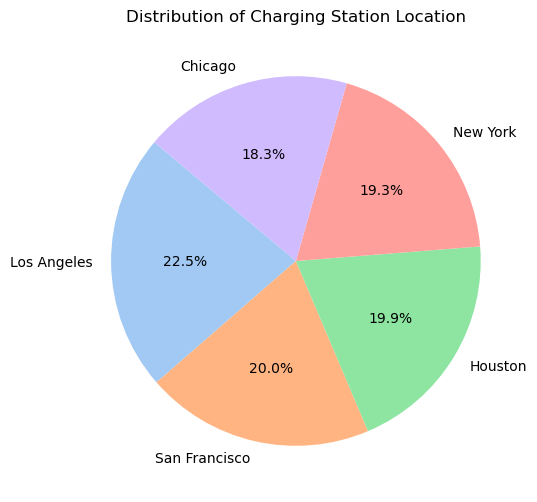

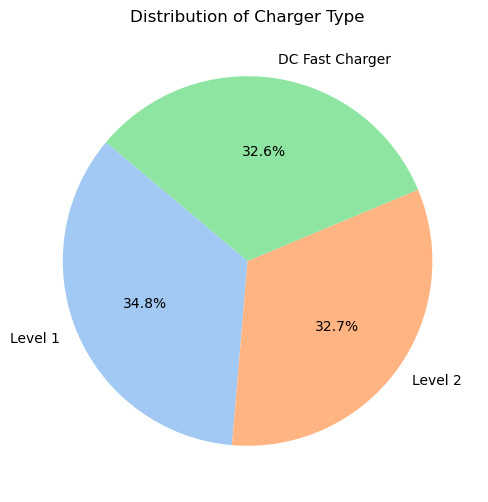

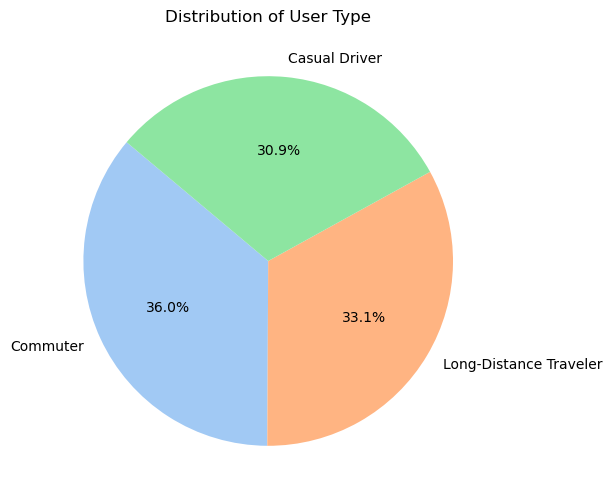

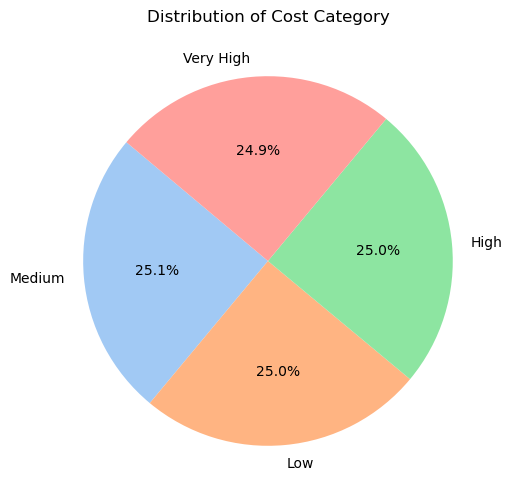

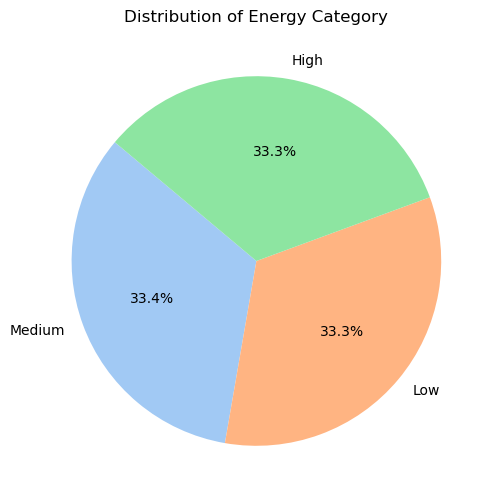

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_selected_pie_charts(df, columns):
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(6, 6))  # Set figure size
            counts = df[column].value_counts()  # Count unique values
            labels = counts.index
            colors = sns.color_palette("pastel")  # Use a pastel color scheme

            plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
            plt.title(f"Distribution of {column}")
            plt.show()  # Display pie chart
        else:
            print(f"⚠️ Column '{column}' not found in the dataset.")

# Example Usage: Choose specific columns
selected_columns = [ "Charging Station Location","Charger Type","User Type","Cost Category", "Energy Category",]
plot_selected_pie_charts(df, selected_columns)


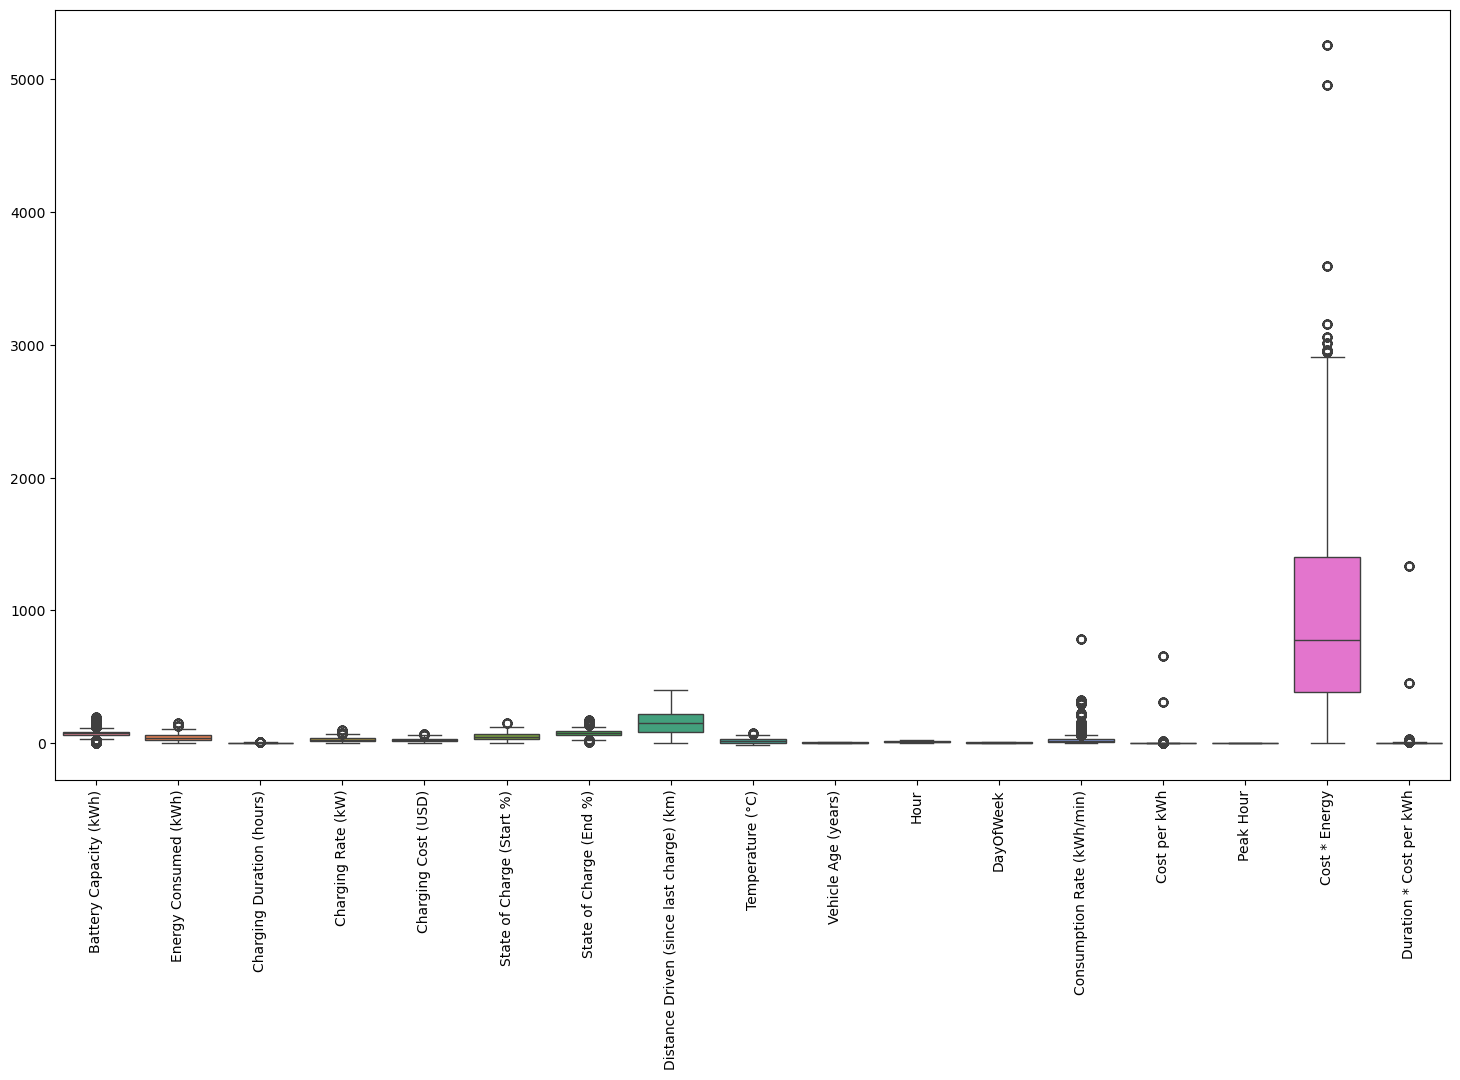

In [321]:
plt.figure(figsize=(18,10))
sns.boxplot(df)
plt.xticks(rotation=90);

In [322]:
def plot_numerical_bars(df, category_col, numerical_col):
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x=category_col, y=numerical_col, estimator=sum, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Bar Plot of {numerical_col} by {category_col}")
    plt.xlabel(category_col)
    plt.ylabel(f"Total {numerical_col}")
    plt.show()



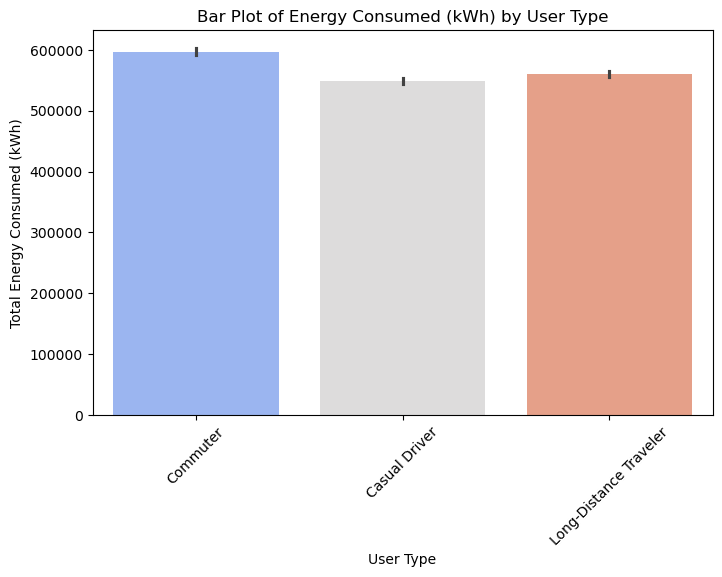

In [323]:

plot_numerical_bars(df, "User Type", "Energy Consumed (kWh)")

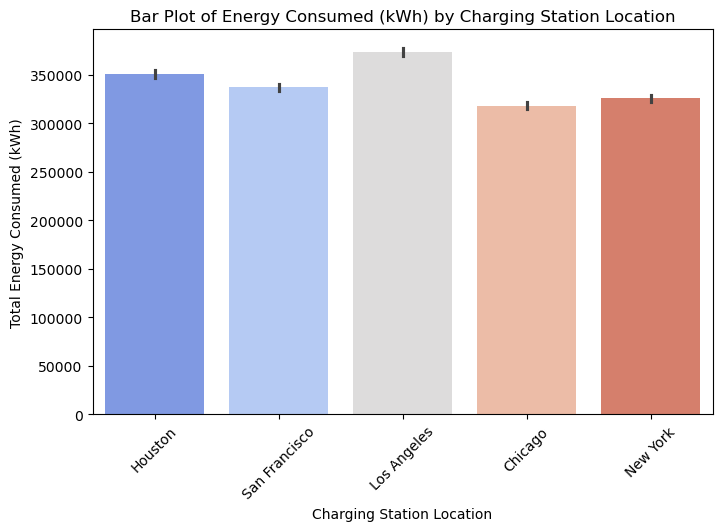

In [362]:
plot_numerical_bars(df, "Charging Station Location", "Energy Consumed (kWh)")

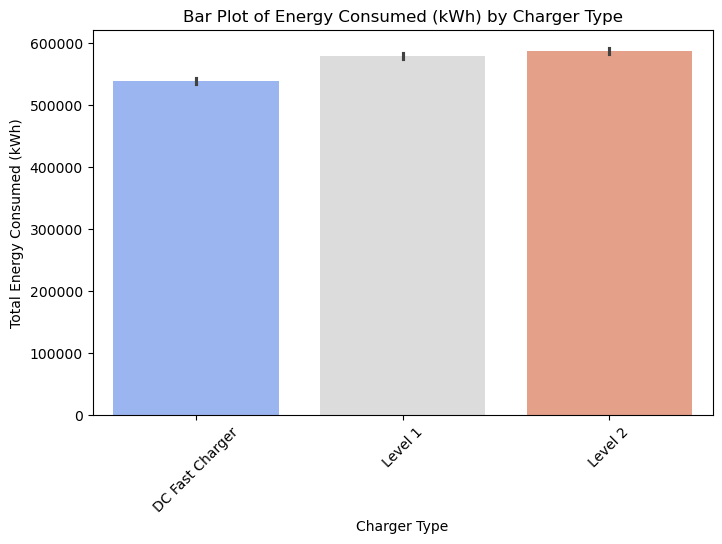

In [363]:
plot_numerical_bars(df, "Charger Type", "Energy Consumed (kWh)")

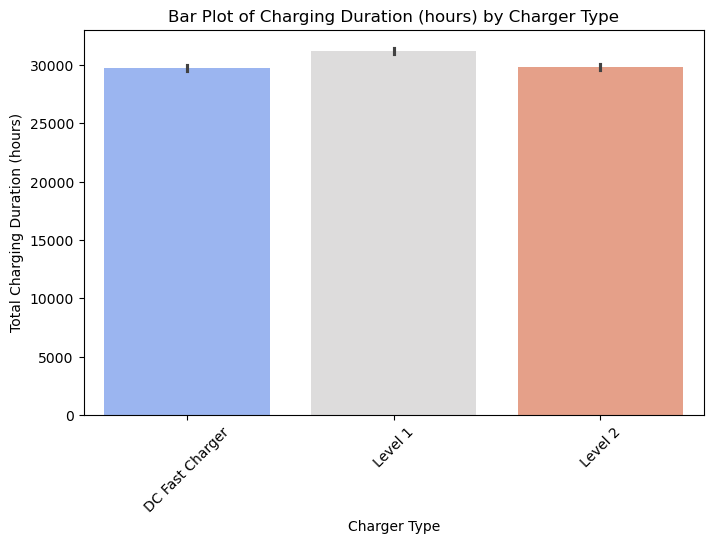

In [364]:
plot_numerical_bars(df, "Charger Type", "Charging Duration (hours)")

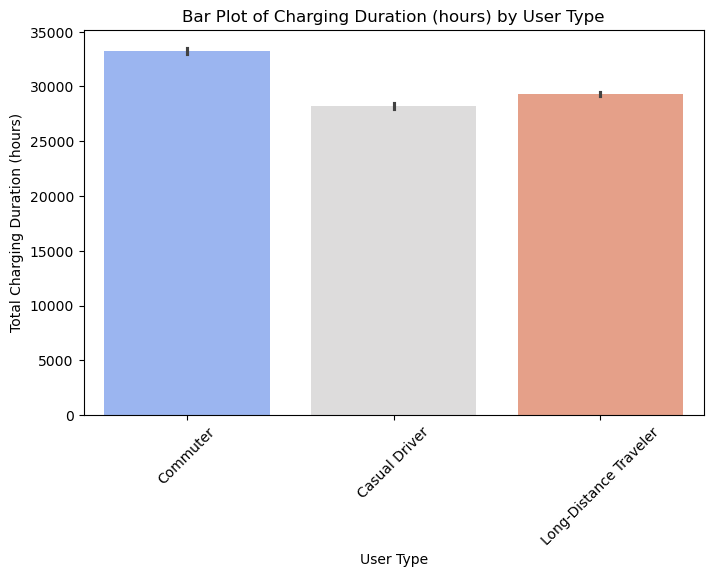

In [365]:
plot_numerical_bars(df, "User Type", "Charging Duration (hours)")

In [324]:
def univariateAnalysis_numeric(column):
    print("----------------------------------------------------------------------------")
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe())
    print("----------------------------------------------------------------------------")
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [325]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type', 'Charging_Start',
       'Hour', 'DayOfWeek', 'Charging_end', 'Consumption Rate (kWh/min)',
       'Cost per kWh', 'Peak Hour', 'Cost * Energy', 'Duration * Cost per kWh',
       'Energy Category', 'Cost Category'],
      dtype='object')

----------------------------------------------------------------------------
Description of Duration * Cost per kWh
----------------------------------------------------------------------------
count    40000.000000
mean         3.305192
std         38.687590
min          0.005528
25%          0.540459
50%          1.064515
75%          2.195219
max       1337.733847
Name: Duration * Cost per kWh, dtype: float64
----------------------------------------------------------------------------
Distribution of Duration * Cost per kWh
----------------------------------------------------------------------------


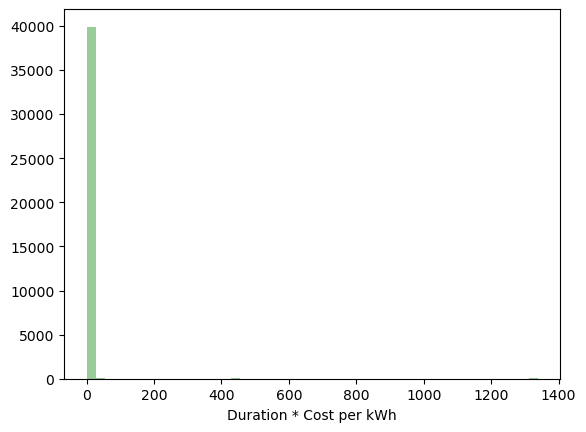

----------------------------------------------------------------------------
BoxPlot of Duration * Cost per kWh
----------------------------------------------------------------------------


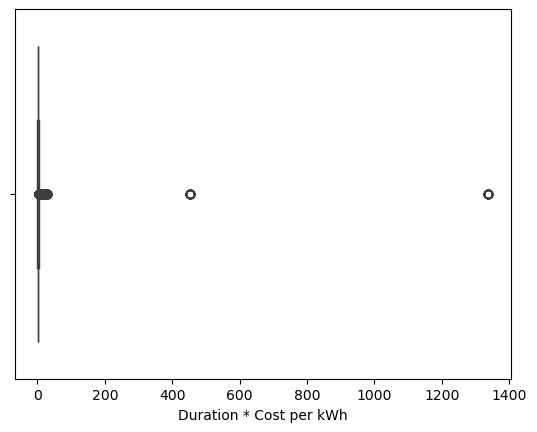

In [326]:
univariateAnalysis_numeric('Duration * Cost per kWh')

----------------------------------------------------------------------------
Description of Cost * Energy
----------------------------------------------------------------------------
count    40000.000000
mean       959.925237
std        712.377587
min          1.371767
25%        383.578107
50%        780.522901
75%       1403.770790
max       5263.499497
Name: Cost * Energy, dtype: float64
----------------------------------------------------------------------------
Distribution of Cost * Energy
----------------------------------------------------------------------------


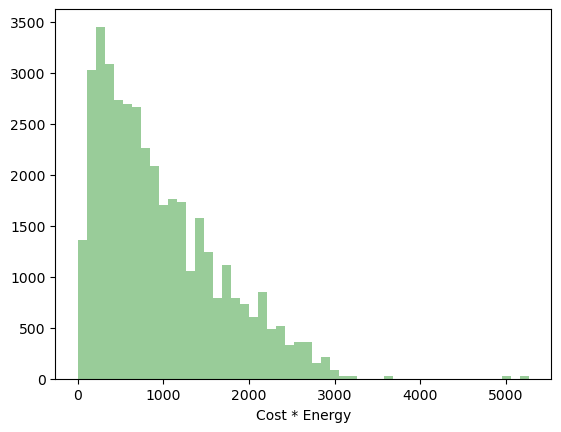

----------------------------------------------------------------------------
BoxPlot of Cost * Energy
----------------------------------------------------------------------------


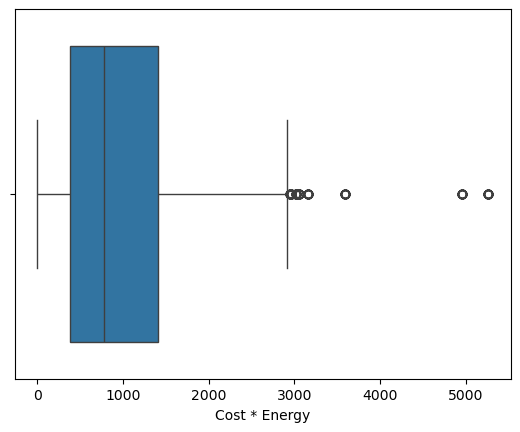

In [327]:
univariateAnalysis_numeric("Cost * Energy")

----------------------------------------------------------------------------
Description of Peak Hour
----------------------------------------------------------------------------
count    40000.00000
mean         0.37485
std          0.48409
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: Peak Hour, dtype: float64
----------------------------------------------------------------------------
Distribution of Peak Hour
----------------------------------------------------------------------------


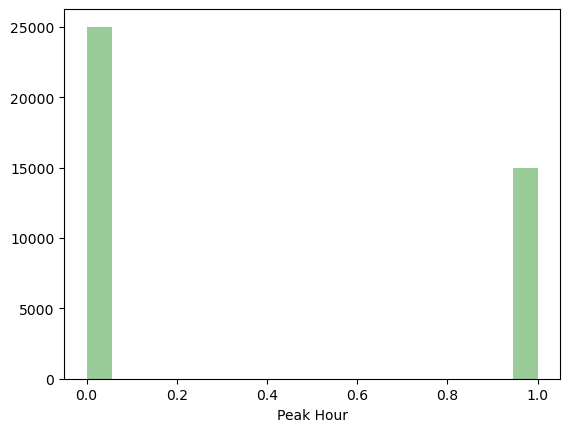

----------------------------------------------------------------------------
BoxPlot of Peak Hour
----------------------------------------------------------------------------


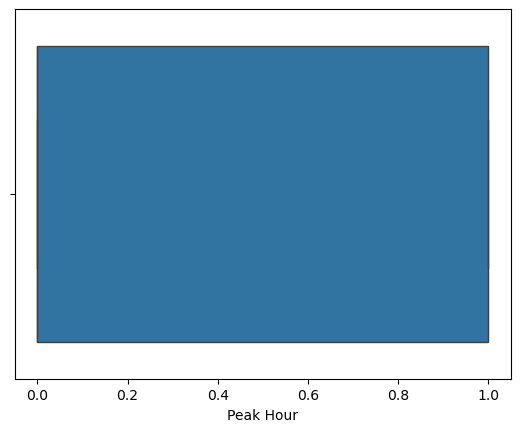

In [328]:
univariateAnalysis_numeric('Peak Hour')

----------------------------------------------------------------------------
Description of Cost per kWh
----------------------------------------------------------------------------
count    40000.000000
mean         1.597748
std         19.844652
min          0.004520
25%          0.300223
50%          0.541769
75%          0.914074
max        654.762090
Name: Cost per kWh, dtype: float64
----------------------------------------------------------------------------
Distribution of Cost per kWh
----------------------------------------------------------------------------


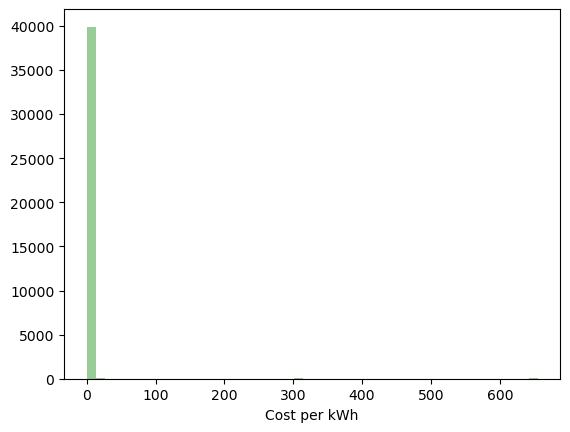

----------------------------------------------------------------------------
BoxPlot of Cost per kWh
----------------------------------------------------------------------------


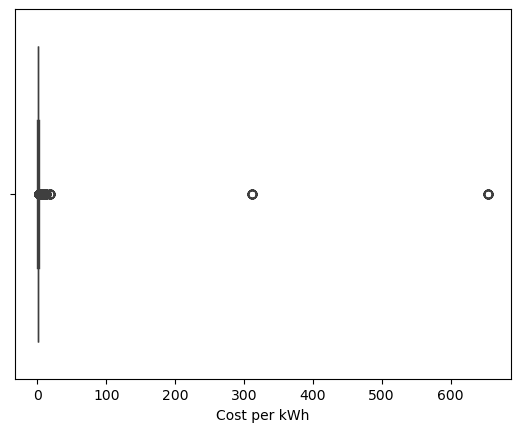

In [329]:
univariateAnalysis_numeric("Cost per kWh")

----------------------------------------------------------------------------
Description of Consumption Rate (kWh/min)
----------------------------------------------------------------------------
count    40000.000000
mean        26.483056
std         34.604969
min          0.022403
25%         10.948338
50%         18.974570
75%         30.263707
max        784.135184
Name: Consumption Rate (kWh/min), dtype: float64
----------------------------------------------------------------------------
Distribution of Consumption Rate (kWh/min)
----------------------------------------------------------------------------


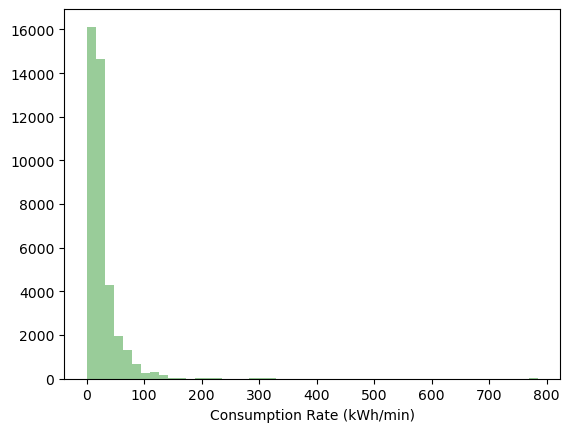

----------------------------------------------------------------------------
BoxPlot of Consumption Rate (kWh/min)
----------------------------------------------------------------------------


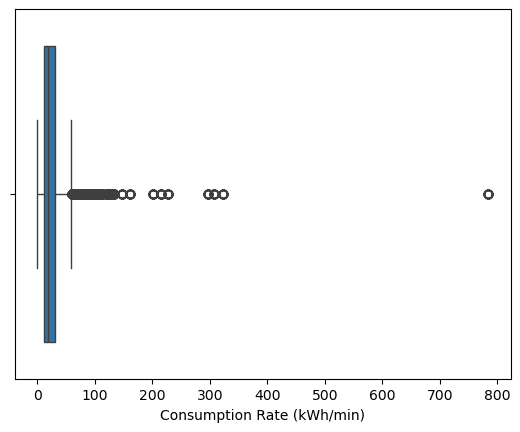

In [330]:
univariateAnalysis_numeric('Consumption Rate (kWh/min)')

----------------------------------------------------------------------------
Description of Battery Capacity (kWh)
----------------------------------------------------------------------------
count    40000.000000
mean        74.541133
std         20.607907
min          1.532807
25%         62.000000
50%         75.000000
75%         85.000000
max        193.003074
Name: Battery Capacity (kWh), dtype: float64
----------------------------------------------------------------------------
Distribution of Battery Capacity (kWh)
----------------------------------------------------------------------------


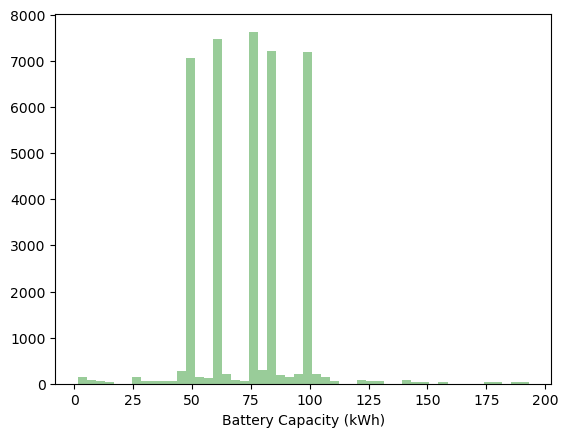

----------------------------------------------------------------------------
BoxPlot of Battery Capacity (kWh)
----------------------------------------------------------------------------


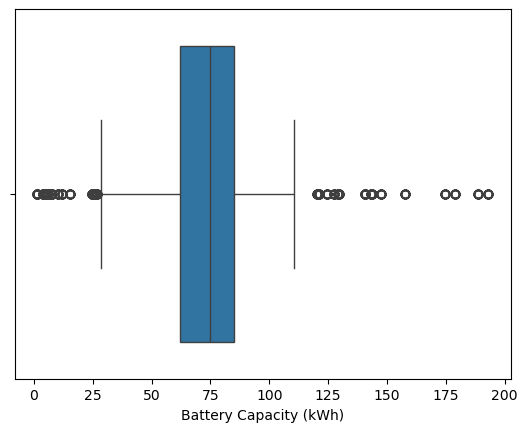

In [331]:
univariateAnalysis_numeric('Battery Capacity (kWh)')

----------------------------------------------------------------------------
Description of Energy Consumed (kWh)
----------------------------------------------------------------------------
count    40000.000000
mean        42.643465
std         21.839022
min          0.045772
25%         24.868084
50%         42.183390
75%         60.613794
max        152.238758
Name: Energy Consumed (kWh), dtype: float64
----------------------------------------------------------------------------
Distribution of Energy Consumed (kWh)
----------------------------------------------------------------------------


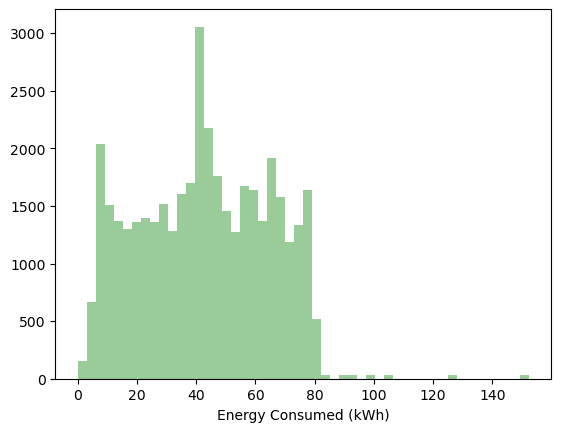

----------------------------------------------------------------------------
BoxPlot of Energy Consumed (kWh)
----------------------------------------------------------------------------


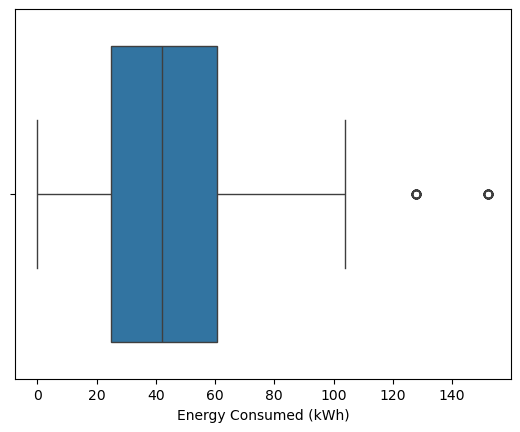

In [332]:
univariateAnalysis_numeric('Energy Consumed (kWh)')

----------------------------------------------------------------------------
Description of Charging Duration (hours)
----------------------------------------------------------------------------
count    40000.000000
mean         2.269227
std          1.060667
min          0.095314
25%          1.394747
50%          2.260747
75%          3.116225
max          7.635145
Name: Charging Duration (hours), dtype: float64
----------------------------------------------------------------------------
Distribution of Charging Duration (hours)
----------------------------------------------------------------------------


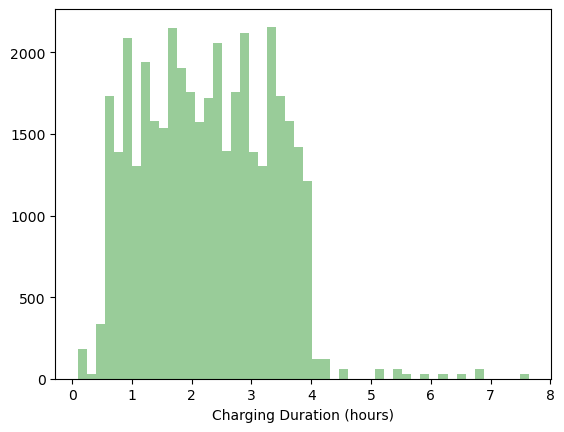

----------------------------------------------------------------------------
BoxPlot of Charging Duration (hours)
----------------------------------------------------------------------------


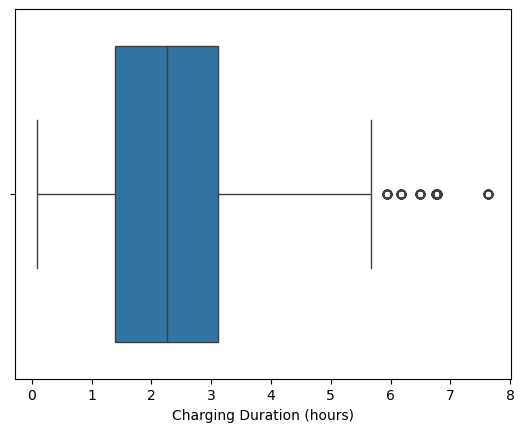

In [333]:
univariateAnalysis_numeric('Charging Duration (hours)')

----------------------------------------------------------------------------
Description of Charging Rate (kW)
----------------------------------------------------------------------------
count    40000.000000
mean        25.961275
std         13.654831
min          1.472549
25%         14.420929
50%         25.961275
75%         36.932242
max         97.342255
Name: Charging Rate (kW), dtype: float64
----------------------------------------------------------------------------
Distribution of Charging Rate (kW)
----------------------------------------------------------------------------


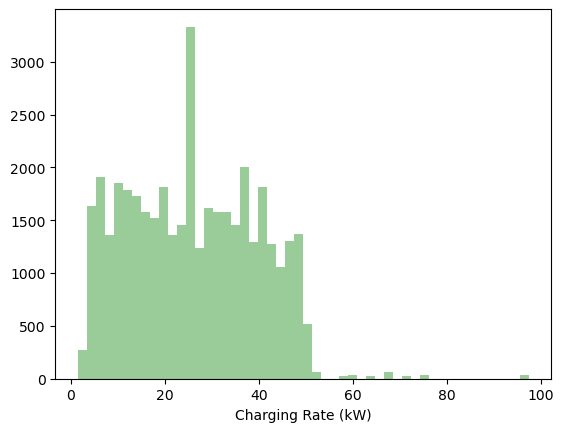

----------------------------------------------------------------------------
BoxPlot of Charging Rate (kW)
----------------------------------------------------------------------------


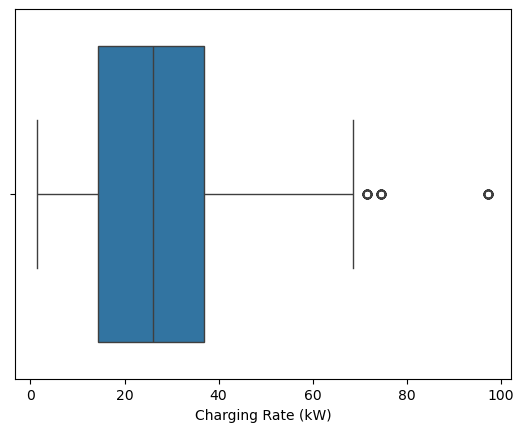

In [334]:
univariateAnalysis_numeric('Charging Rate (kW)')

----------------------------------------------------------------------------
Description of Charging Cost (USD)
----------------------------------------------------------------------------
count    40000.000000
mean        22.553023
std         10.746579
min          0.234317
25%         13.368141
50%         22.081164
75%         31.651427
max         69.407743
Name: Charging Cost (USD), dtype: float64
----------------------------------------------------------------------------
Distribution of Charging Cost (USD)
----------------------------------------------------------------------------


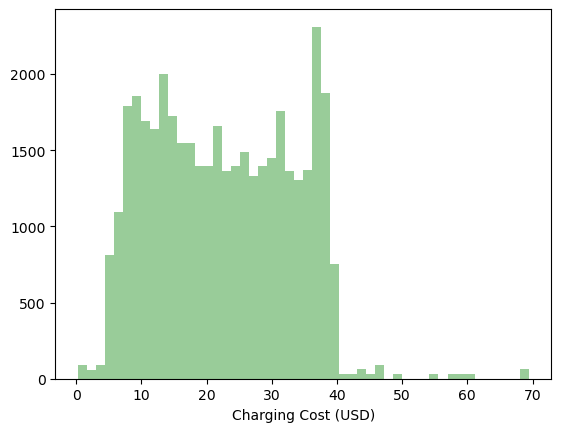

----------------------------------------------------------------------------
BoxPlot of Charging Cost (USD)
----------------------------------------------------------------------------


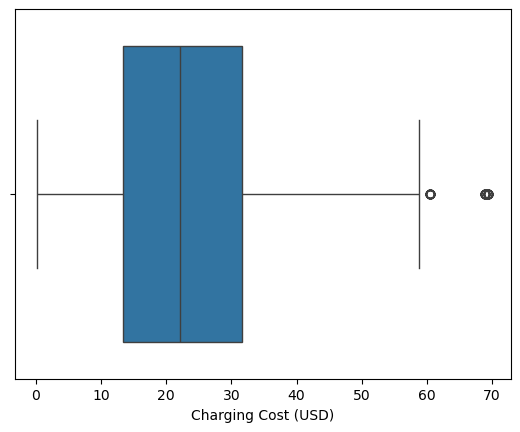

In [335]:
univariateAnalysis_numeric('Charging Cost (USD)')

----------------------------------------------------------------------------
Description of State of Charge (Start %)
----------------------------------------------------------------------------
count    40000.000000
mean        49.144608
std         24.075000
min          2.325959
25%         27.790526
50%         48.294420
75%         69.292214
max        152.489761
Name: State of Charge (Start %), dtype: float64
----------------------------------------------------------------------------
Distribution of State of Charge (Start %)
----------------------------------------------------------------------------


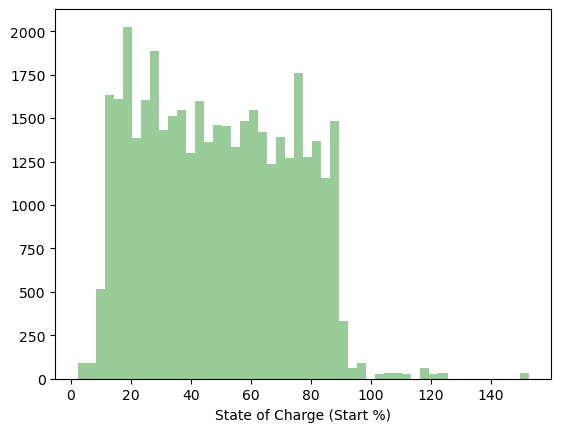

----------------------------------------------------------------------------
BoxPlot of State of Charge (Start %)
----------------------------------------------------------------------------


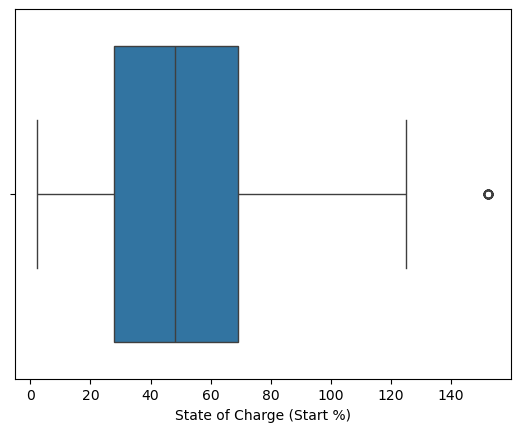

In [336]:
univariateAnalysis_numeric('State of Charge (Start %)')

----------------------------------------------------------------------------
Description of State of Charge (End %)
----------------------------------------------------------------------------
count    40000.000000
mean        75.139823
std         17.065503
min          7.604224
25%         62.059917
50%         75.668899
75%         88.200073
max        177.708666
Name: State of Charge (End %), dtype: float64
----------------------------------------------------------------------------
Distribution of State of Charge (End %)
----------------------------------------------------------------------------


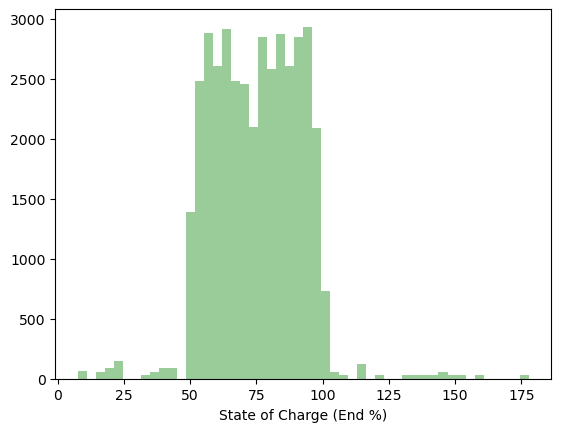

----------------------------------------------------------------------------
BoxPlot of State of Charge (End %)
----------------------------------------------------------------------------


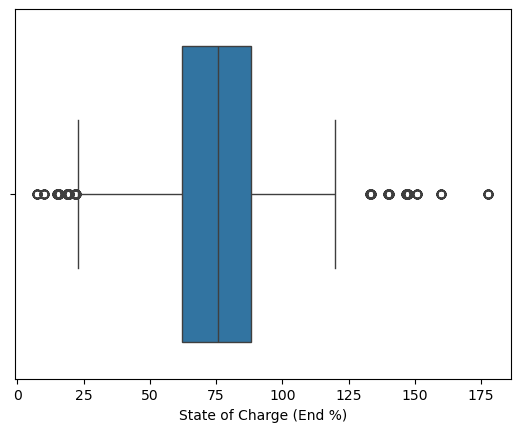

In [337]:
univariateAnalysis_numeric('State of Charge (End %)')

----------------------------------------------------------------------------
Description of Distance Driven (since last charge) (km)
----------------------------------------------------------------------------
count    40000.000000
mean       153.606693
std         83.774655
min          0.862361
25%         81.968401
50%        153.606693
75%        221.896778
max        398.364775
Name: Distance Driven (since last charge) (km), dtype: float64
----------------------------------------------------------------------------
Distribution of Distance Driven (since last charge) (km)
----------------------------------------------------------------------------


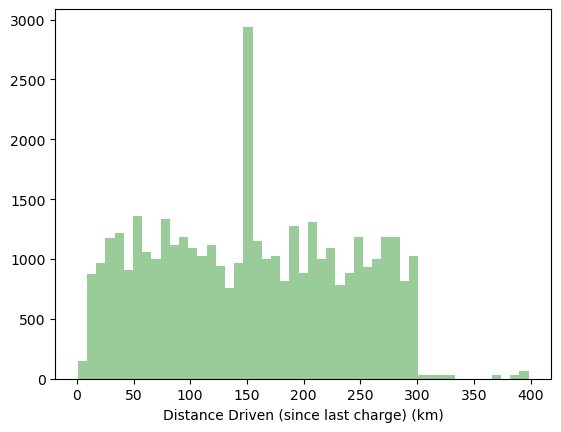

----------------------------------------------------------------------------
BoxPlot of Distance Driven (since last charge) (km)
----------------------------------------------------------------------------


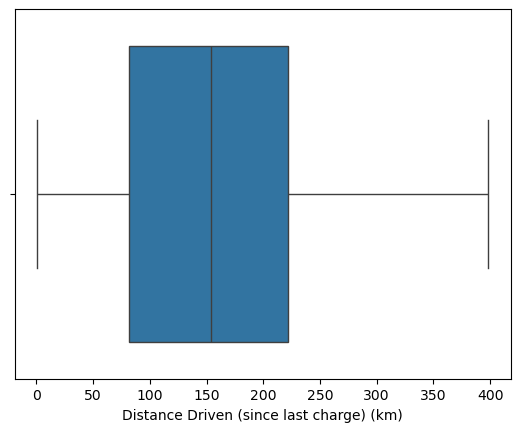

In [338]:
univariateAnalysis_numeric('Distance Driven (since last charge) (km)')

----------------------------------------------------------------------------
Description of Temperature (°C)
----------------------------------------------------------------------------
count    40000.000000
mean        15.262999
std         14.825168
min        -10.724770
25%          2.800664
50%         14.619838
75%         28.056578
max         73.169588
Name: Temperature (°C), dtype: float64
----------------------------------------------------------------------------
Distribution of Temperature (°C)
----------------------------------------------------------------------------


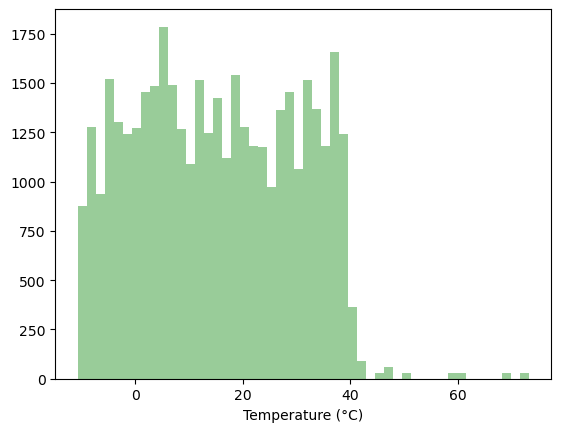

----------------------------------------------------------------------------
BoxPlot of Temperature (°C)
----------------------------------------------------------------------------


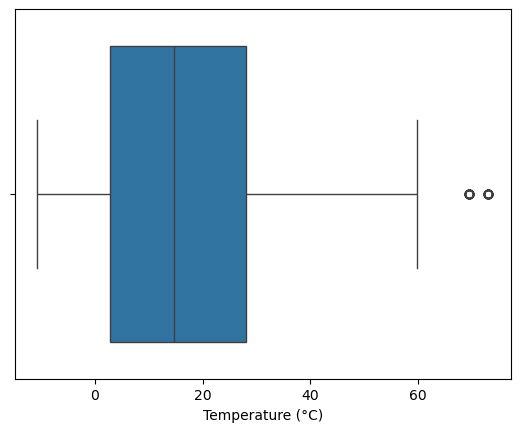

In [339]:
univariateAnalysis_numeric('Temperature (°C)')

----------------------------------------------------------------------------
Description of Vehicle Age (years)
----------------------------------------------------------------------------
count    40000.000000
mean         3.612736
std          2.309486
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         11.688592
Name: Vehicle Age (years), dtype: float64
----------------------------------------------------------------------------
Distribution of Vehicle Age (years)
----------------------------------------------------------------------------


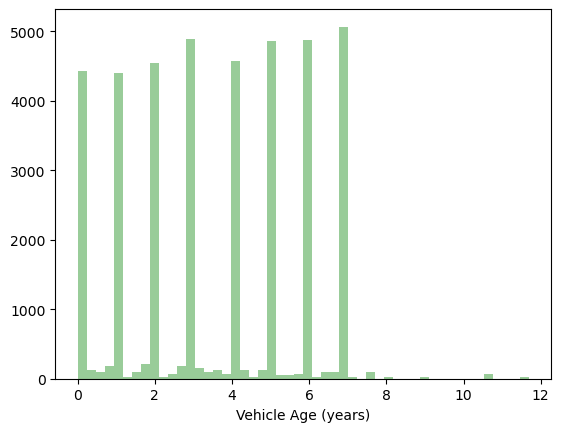

----------------------------------------------------------------------------
BoxPlot of Vehicle Age (years)
----------------------------------------------------------------------------


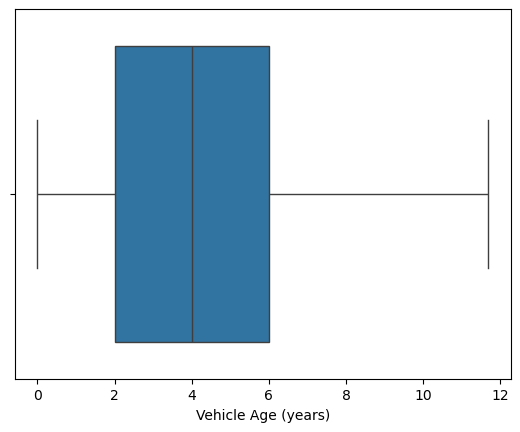

In [340]:
univariateAnalysis_numeric('Vehicle Age (years)')

In [341]:
def bivariateAnalysis(x_col, y_col):
    print("----------------------------------------------------------------------------")
    print(f"Bivariate Analysis: {x_col} vs {y_col}")
    print("----------------------------------------------------------------------------")
    
    # Scatter Plot (for numerical vs numerical)
    if df[x_col].dtype in ['int64', 'float64'] and df[y_col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 5))
        print(f"Scatter Plot: {x_col} vs {y_col}")
        print("----------------------------------------------------------------------------")
        sns.scatterplot(x=df[x_col], y=df[y_col], color='b')
        plt.show()

    # Box Plot (for categorical vs numerical)
    elif df[x_col].dtype == 'object' and df[y_col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 5))
        print(f"Box Plot: {y_col} across {x_col}")
        print("----------------------------------------------------------------------------")
        sns.boxplot(x=df[x_col], y=df[y_col], palette="coolwarm")
        plt.xticks(rotation=45)
        plt.show()

    # Violin Plot (for categorical vs numerical)
    elif df[x_col].dtype == 'object' and df[y_col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 5))
        print(f"Violin Plot: {y_col} across {x_col}")
        print("----------------------------------------------------------------------------")
        sns.violinplot(x=df[x_col], y=df[y_col], palette="muted")
        plt.xticks(rotation=45)
        plt.show()

    # Correlation Heatmap (for numerical vs numerical)
    if df[x_col].dtype in ['int64', 'float64'] and df[y_col].dtype in ['int64', 'float64']:
        print("Correlation Heatmap:")
        print("----------------------------------------------------------------------------")
        plt.figure(figsize=(6, 4))
        sns.heatmap(df[[x_col, y_col]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.show()



----------------------------------------------------------------------------
Bivariate Analysis: Charging Cost (USD) vs Energy Consumed (kWh)
----------------------------------------------------------------------------
Scatter Plot: Charging Cost (USD) vs Energy Consumed (kWh)
----------------------------------------------------------------------------


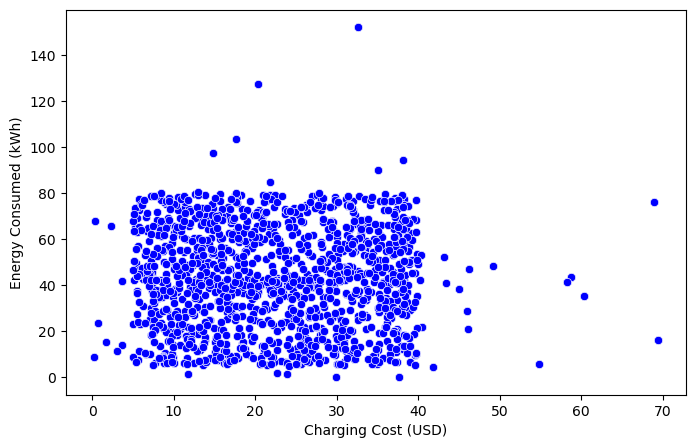

Correlation Heatmap:
----------------------------------------------------------------------------


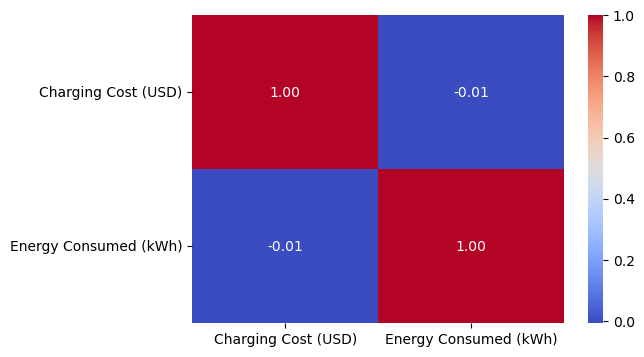

In [342]:
bivariateAnalysis('Charging Cost (USD)', 'Energy Consumed (kWh)')

----------------------------------------------------------------------------
Bivariate Analysis: Charging Cost (USD) vs Charging Duration (hours)
----------------------------------------------------------------------------
Scatter Plot: Charging Cost (USD) vs Charging Duration (hours)
----------------------------------------------------------------------------


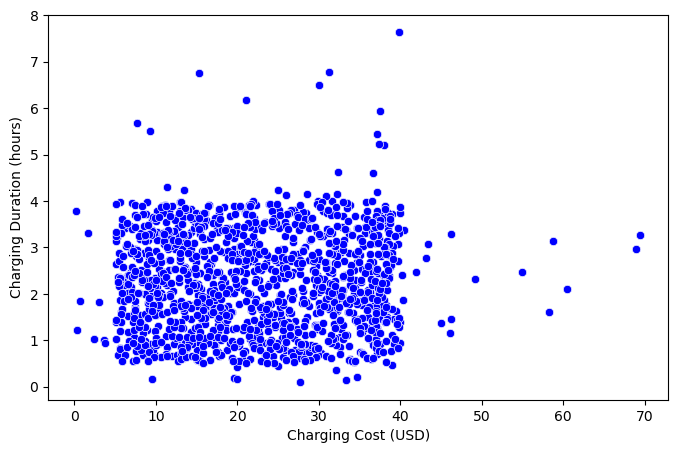

Correlation Heatmap:
----------------------------------------------------------------------------


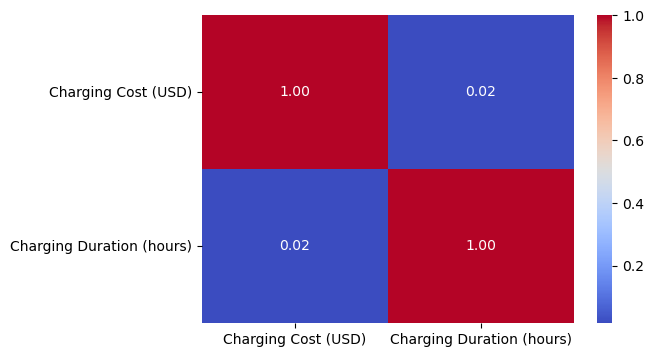

In [343]:
bivariateAnalysis('Charging Cost (USD)', 'Charging Duration (hours)')

----------------------------------------------------------------------------
Bivariate Analysis: Charging Cost (USD) vs Charging Rate (kW)
----------------------------------------------------------------------------
Scatter Plot: Charging Cost (USD) vs Charging Rate (kW)
----------------------------------------------------------------------------


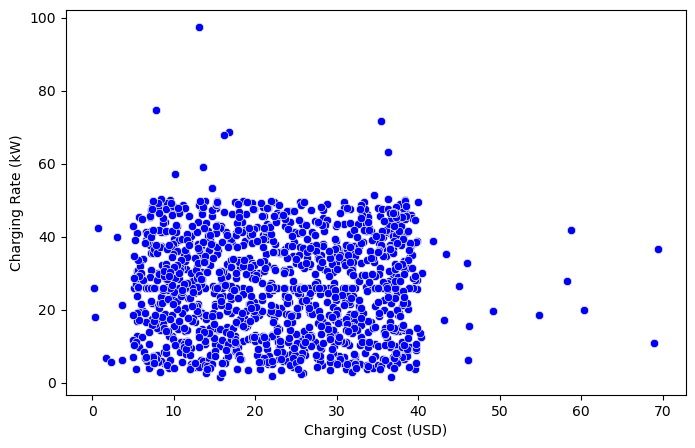

Correlation Heatmap:
----------------------------------------------------------------------------


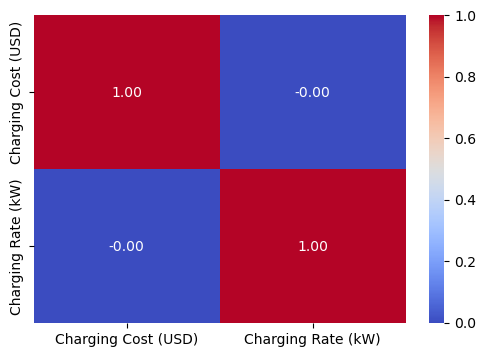

In [344]:
bivariateAnalysis('Charging Cost (USD)', 'Charging Rate (kW)')

----------------------------------------------------------------------------
Bivariate Analysis: Charging Cost (USD) vs Battery Capacity (kWh)
----------------------------------------------------------------------------
Scatter Plot: Charging Cost (USD) vs Battery Capacity (kWh)
----------------------------------------------------------------------------


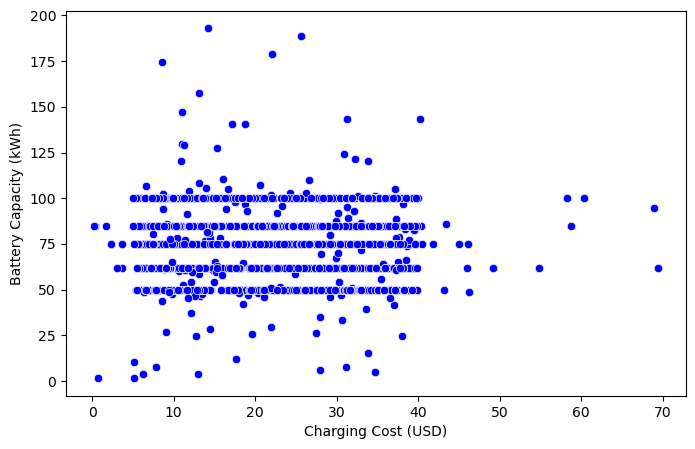

Correlation Heatmap:
----------------------------------------------------------------------------


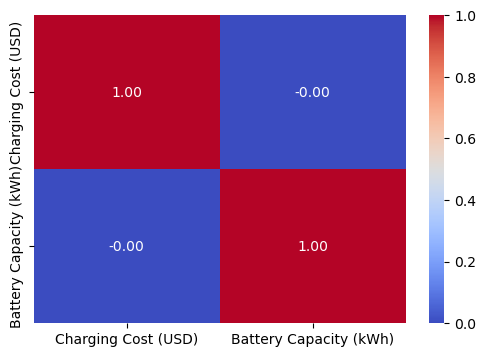

In [345]:
bivariateAnalysis('Charging Cost (USD)', 'Battery Capacity (kWh)')

----------------------------------------------------------------------------
Bivariate Analysis: Charging Cost (USD) vs State of Charge (Start %)
----------------------------------------------------------------------------
Scatter Plot: Charging Cost (USD) vs State of Charge (Start %)
----------------------------------------------------------------------------


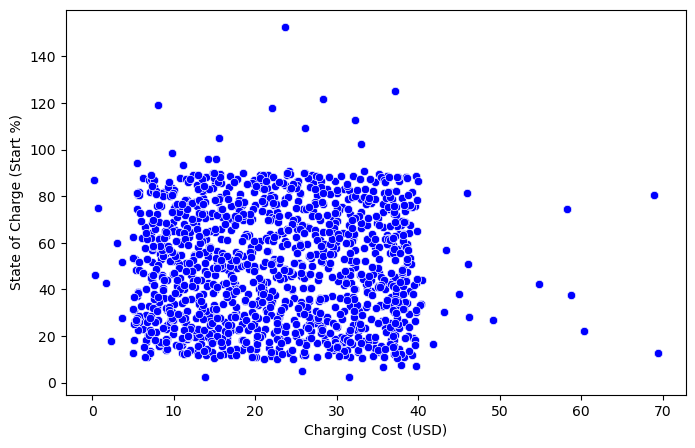

Correlation Heatmap:
----------------------------------------------------------------------------


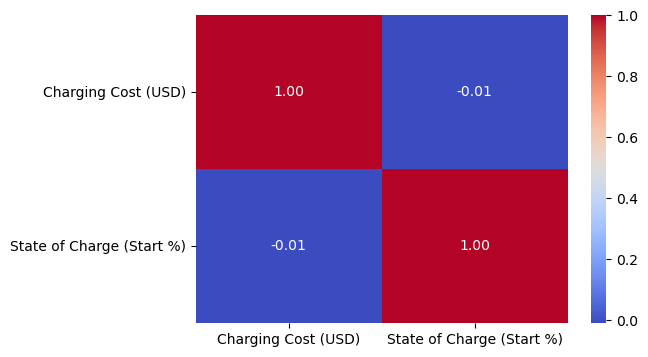

In [346]:
bivariateAnalysis('Charging Cost (USD)', 'State of Charge (Start %)')

----------------------------------------------------------------------------
Bivariate Analysis: Charging Cost (USD) vs State of Charge (End %)
----------------------------------------------------------------------------
Scatter Plot: Charging Cost (USD) vs State of Charge (End %)
----------------------------------------------------------------------------


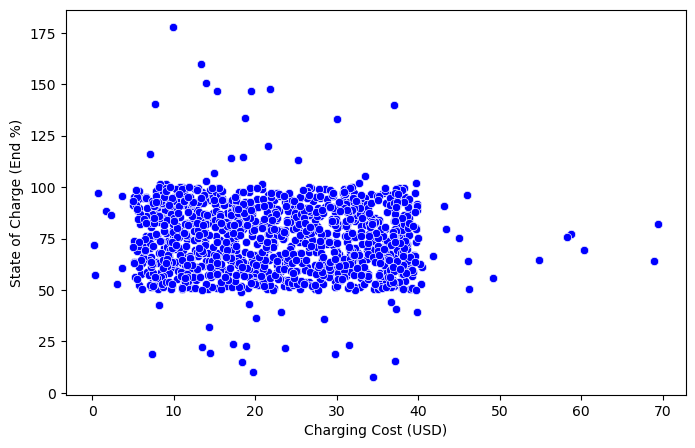

Correlation Heatmap:
----------------------------------------------------------------------------


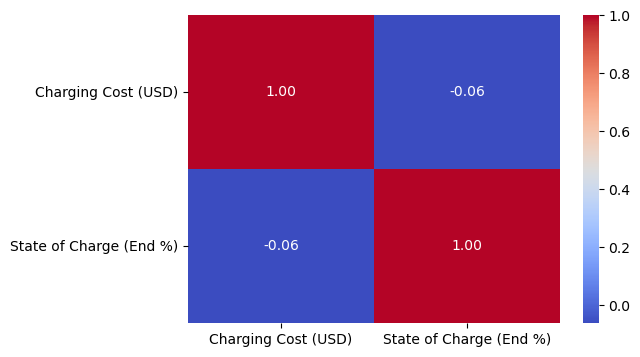

In [347]:
bivariateAnalysis('Charging Cost (USD)', 'State of Charge (End %)')

----------------------------------------------------------------------------
Bivariate Analysis: Charging Cost (USD) vs Distance Driven (since last charge) (km)
----------------------------------------------------------------------------
Scatter Plot: Charging Cost (USD) vs Distance Driven (since last charge) (km)
----------------------------------------------------------------------------


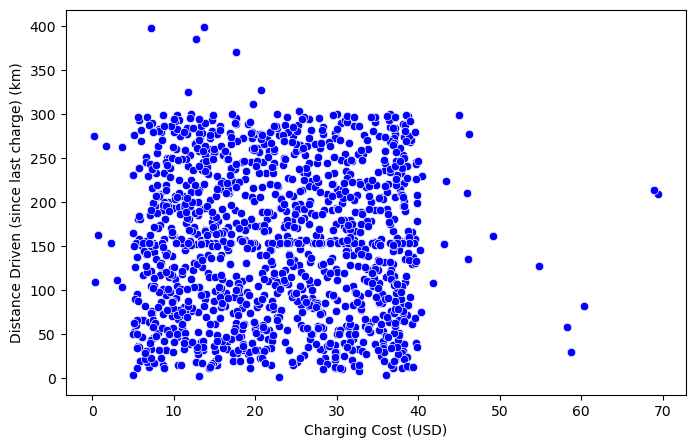

Correlation Heatmap:
----------------------------------------------------------------------------


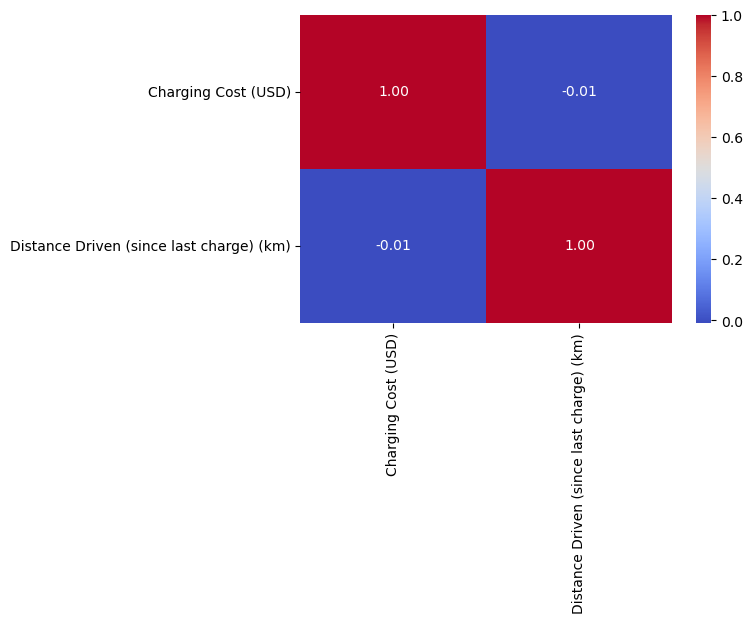

In [348]:
bivariateAnalysis('Charging Cost (USD)', 'Distance Driven (since last charge) (km)')

----------------------------------------------------------------------------
Bivariate Analysis: Charging Cost (USD) vs Temperature (°C)
----------------------------------------------------------------------------
Scatter Plot: Charging Cost (USD) vs Temperature (°C)
----------------------------------------------------------------------------


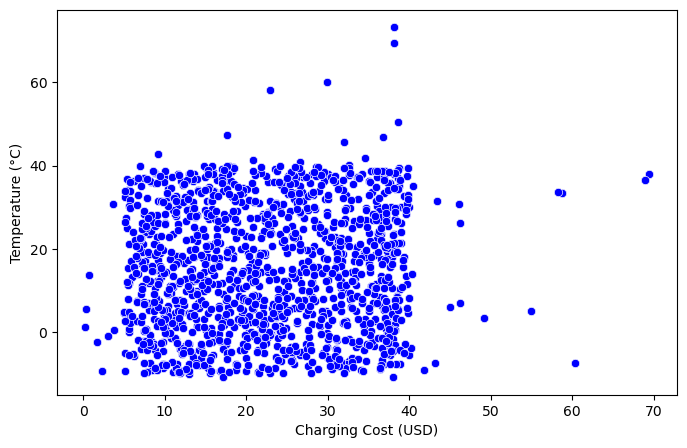

Correlation Heatmap:
----------------------------------------------------------------------------


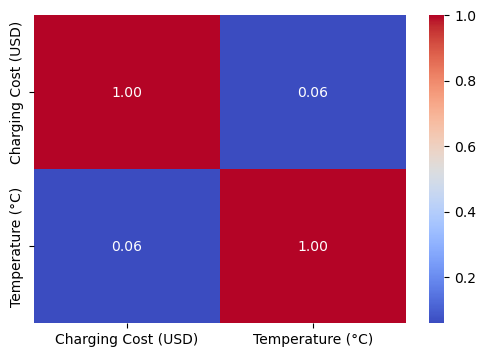

In [349]:
bivariateAnalysis('Charging Cost (USD)', 'Temperature (°C)')

----------------------------------------------------------------------------
Bivariate Analysis: Charging Cost (USD) vs Vehicle Age (years)
----------------------------------------------------------------------------
Scatter Plot: Charging Cost (USD) vs Vehicle Age (years)
----------------------------------------------------------------------------


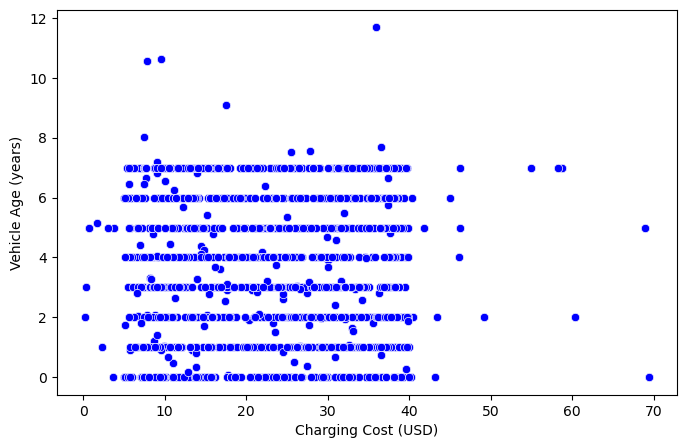

Correlation Heatmap:
----------------------------------------------------------------------------


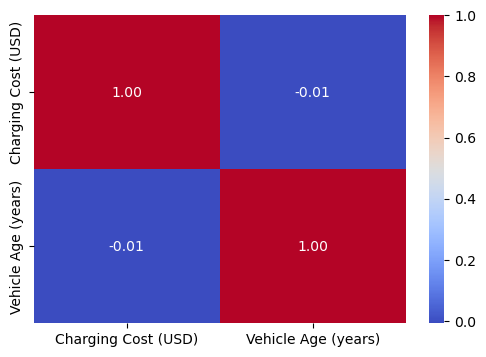

In [350]:
bivariateAnalysis('Charging Cost (USD)', 'Vehicle Age (years)')

In [351]:
import scipy.stats as stats
from scipy.stats import shapiro, kstest, normaltest, ttest_1samp, ttest_ind, chi2_contingency, f_oneway

In [352]:
numerical_columns = [
    "Energy Consumed (kWh)", "Charging Duration (hours)", "Charging Rate (kW)",
    "Charging Cost (USD)", "State of Charge (Start %)", "State of Charge (End %)",
    "Distance Driven (since last charge) (km)", "Temperature (°C)", "Vehicle Age (years)"
]

In [353]:
desc_stats = df[numerical_columns].describe().T
desc_stats["Skewness"] = df[numerical_columns].skew()
desc_stats["Kurtosis"] = df[numerical_columns].kurtosis()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
                                             count        mean        std  \
Energy Consumed (kWh)                     40000.0   42.643465  21.839022   
Charging Duration (hours)                 40000.0    2.269227   1.060667   
Charging Rate (kW)                        40000.0   25.961275  13.654831   
Charging Cost (USD)                       40000.0   22.553023  10.746579   
State of Charge (Start %)                 40000.0   49.144608  24.075000   
State of Charge (End %)                   40000.0   75.139823  17.065503   
Distance Driven (since last charge) (km)  40000.0  153.606693  83.774655   
Temperature (°C)                          40000.0   15.262999  14.825168   
Vehicle Age (years)                       40000.0    3.612736   2.309486   

                                                min        25%         50%  \
Energy Consumed (kWh)                      0.045772  24.868084   42.183390   
Charging Duration (hours)                  0.095314   1.39

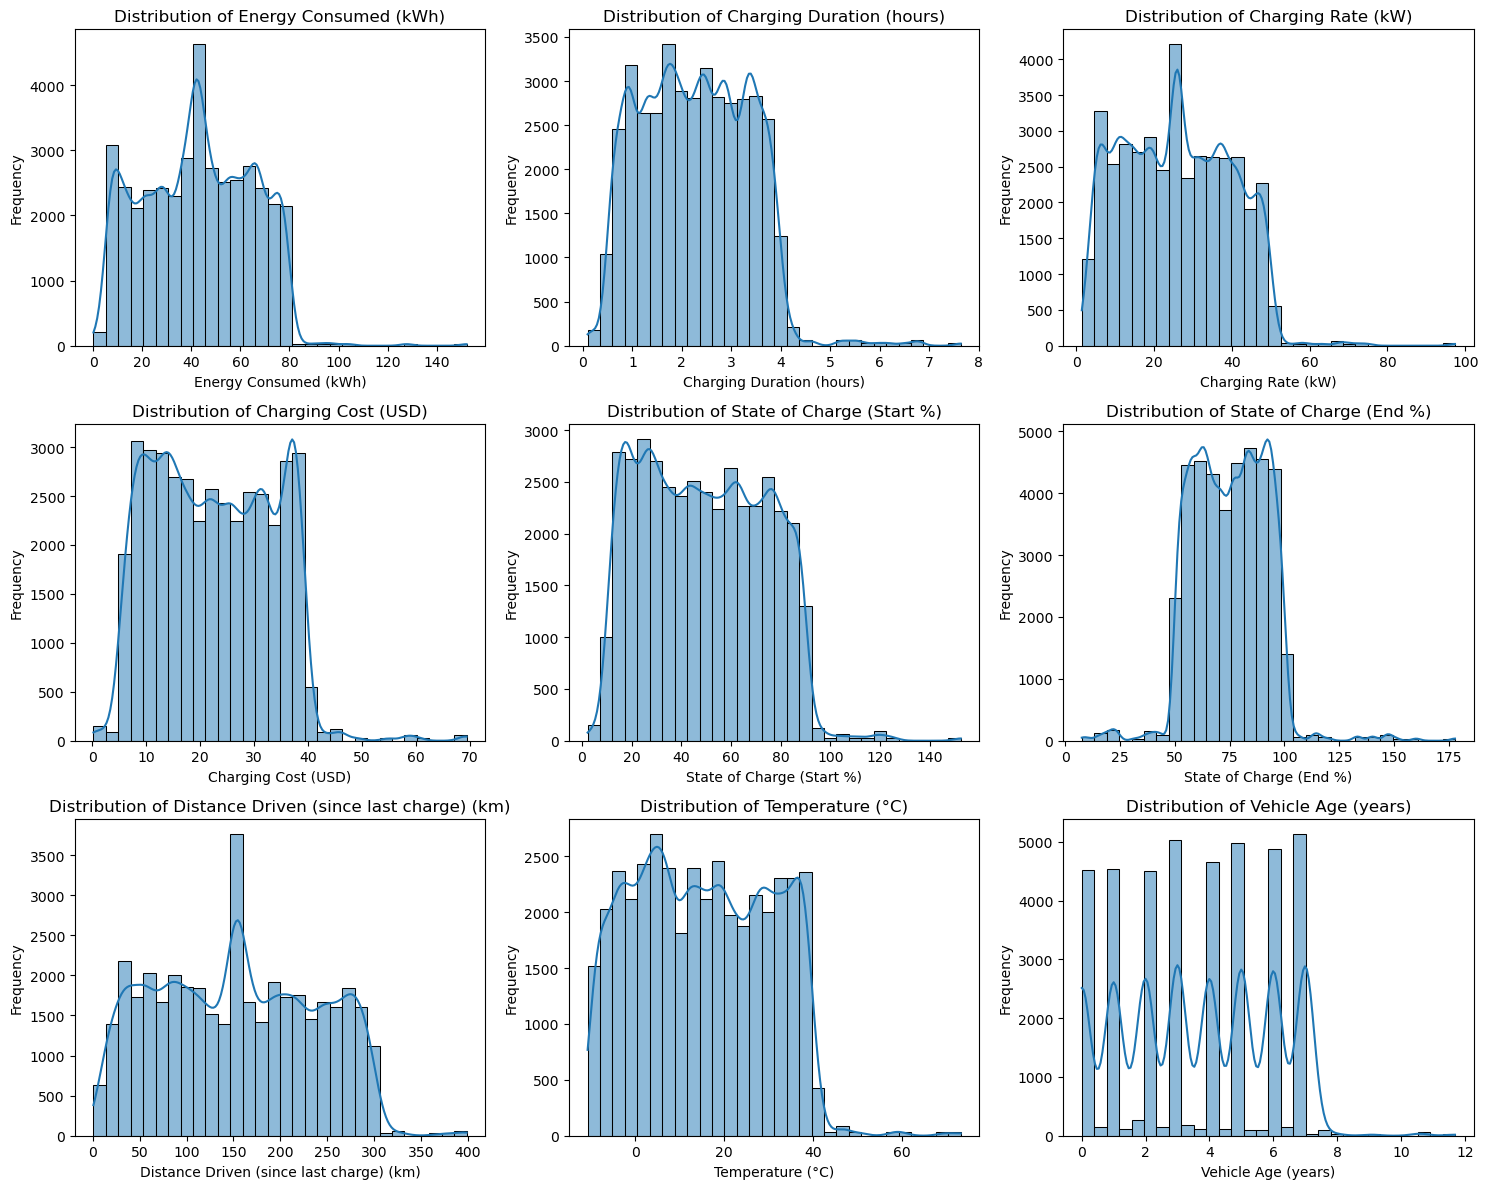

In [354]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [355]:
normality_tests = {}
for col in numerical_columns:
    data = df[col].dropna()
    shapiro_test = shapiro(data.sample(500) if len(data) > 500 else data)
    ks_test = kstest(data, 'norm', args=(data.mean(), data.std()))
    normality_tests[col] = {
        "Shapiro-Wilk p-value": shapiro_test.pvalue,
        "Kolmogorov-Smirnov p-value": ks_test.pvalue
    }
print("Normality Test Results:\n", normality_tests)

Normality Test Results:
 {'Energy Consumed (kWh)': {'Shapiro-Wilk p-value': 8.297565641082597e-09, 'Kolmogorov-Smirnov p-value': 2.1242489278171442e-89}, 'Charging Duration (hours)': {'Shapiro-Wilk p-value': 3.864857887284613e-09, 'Kolmogorov-Smirnov p-value': 2.5984373926599565e-77}, 'Charging Rate (kW)': {'Shapiro-Wilk p-value': 3.546344600666821e-10, 'Kolmogorov-Smirnov p-value': 9.386948434884417e-119}, 'Charging Cost (USD)': {'Shapiro-Wilk p-value': 2.722688780930863e-12, 'Kolmogorov-Smirnov p-value': 1.0118928161305342e-169}, 'State of Charge (Start %)': {'Shapiro-Wilk p-value': 3.954892264819593e-12, 'Kolmogorov-Smirnov p-value': 1.0374844955846017e-161}, 'State of Charge (End %)': {'Shapiro-Wilk p-value': 1.4080481055743984e-15, 'Kolmogorov-Smirnov p-value': 7.309569260032915e-107}, 'Distance Driven (since last charge) (km)': {'Shapiro-Wilk p-value': 4.852408196441224e-10, 'Kolmogorov-Smirnov p-value': 9.542943877399232e-119}, 'Temperature (°C)': {'Shapiro-Wilk p-value': 7.7710

The Shapiro-Wilk test (shapiro()) checks if the data is normally distributed. It returns a p-value, where:

-> p-value > 0.05 → Data is likely normally distributed

-> p-value ≤ 0.05 → Data deviates from normality

The KS test compares the sample data to a normal distribution with the same mean and standard deviation.
It returns a p-value:

-> p-value > 0.05 → Data is likely normal

-> p-value ≤ 0.05 → Data is not normally distributed

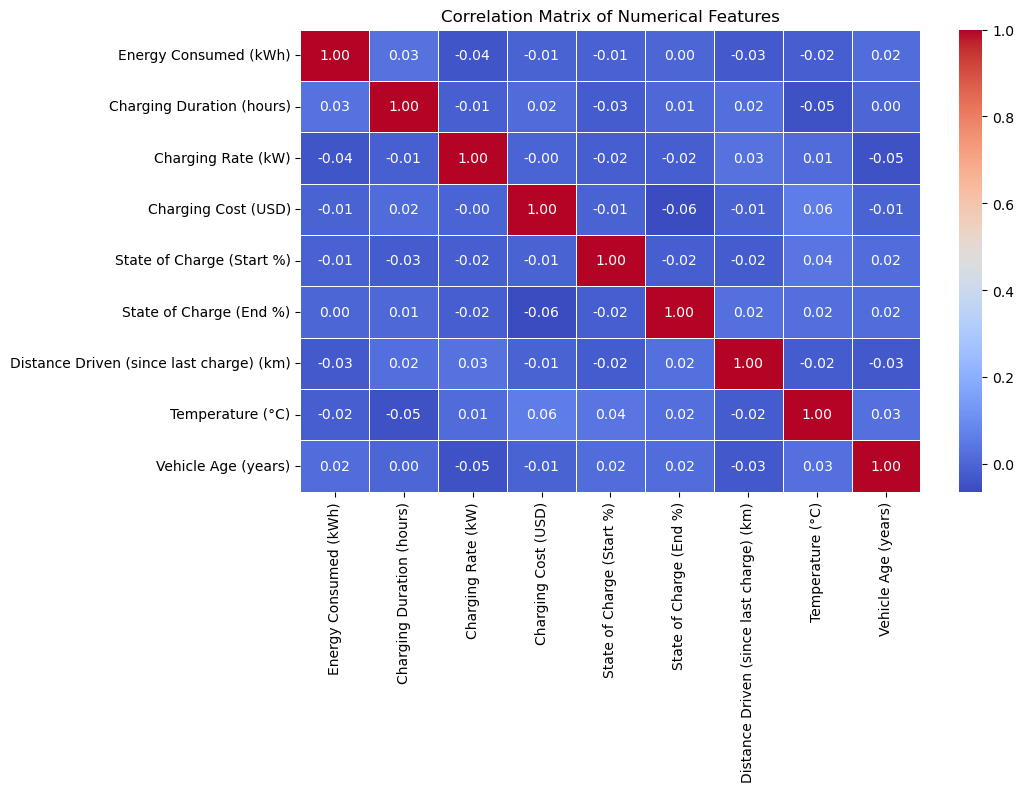

In [356]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### Statistical Analysis

In [357]:
## One-Sample t-test (Testing if mean energy consumed differs from 40 kWh)
t_stat, p_value = ttest_1samp(df["Energy Consumed (kWh)"].dropna(), 40)
print("One-Sample t-test for Energy Consumed:\n", "t-statistic:", t_stat, "p-value:", p_value)

One-Sample t-test for Energy Consumed:
 t-statistic: 24.208635380273872 p-value: 1.5233439791174707e-128


t-statistic (24.21):

The t-statistic measures how far the sample mean is from the hypothesized mean (40 kWh), in units of standard error.
A higher absolute value of the t-statistic suggests that the sample mean is far from the hypothesized population mean, indicating a more significant difference.
A t-statistic of 24.21 is very large, which means the observed mean energy consumption is significantly different from the hypothesized mean of 40 kWh.

p-value (1.5233e-128):

The p-value represents the probability of obtaining a result as extreme as the observed one, assuming the null hypothesis (that the mean energy consumed is 40 kWh) is true.
A very small p-value (in this case, close to zero) indicates that the null hypothesis is extremely unlikely to be true.
Since the p-value is far smaller than 0.05, you can reject the null hypothesis with high confidence.

In [358]:
## Two-Sample t-test (Comparing charging duration for vehicles older and younger than 5 years)
young_vehicles = df[df["Vehicle Age (years)"] < 5]["Charging Duration (hours)"].dropna()
old_vehicles = df[df["Vehicle Age (years)"] >= 5]["Charging Duration (hours)"].dropna()
t_stat, p_value = ttest_ind(young_vehicles, old_vehicles, equal_var=False)
print("Two-Sample t-test for Charging Duration:\n", "t-statistic:", t_stat, "p-value:", p_value)

Two-Sample t-test for Charging Duration:
 t-statistic: -1.3762698094287047 p-value: 0.16874723941657652


t-statistic (-1.38):

The t-statistic tells us how many standard errors the means of the two groups are apart. The negative sign indicates that the mean charging duration for vehicles older than 5 years is slightly less than that for vehicles younger than 5 years.
The absolute value of the t-statistic is 1.38, which is relatively small. This suggests that the difference between the means of the two groups is not very large.

p-value (0.1687):

The p-value measures the probability that the observed difference (or one more extreme) could occur under the null hypothesis, which assumes that the means of both groups are equal.
A p-value greater than 0.05 indicates that there is insufficient evidence to reject the null hypothesis at the 5% significance level.
In this case, the p-value of 0.1687 is greater than 0.05, meaning we fail to reject the null hypothesis. This implies that there is no statistically significant difference in charging duration between vehicles younger than 5 years and vehicles older than 5 years.

In [359]:
## Chi-Square Test (Association between charging cost category and energy consumption category)
df["Cost Category"] = pd.qcut(df["Charging Cost (USD)"], q=4, labels=["Low", "Medium", "High", "Very High"])
df["Energy Category"] = pd.qcut(df["Energy Consumed (kWh)"], q=4, labels=["Low", "Medium", "High", "Very High"])
contingency_table = pd.crosstab(df["Cost Category"], df["Energy Category"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test for Cost vs. Energy Category:\n", "Chi2:", chi2, "p-value:", p_value)

Chi-Square Test for Cost vs. Energy Category:
 Chi2: 311.5395009237667 p-value: 9.287704882568548e-62


Chi-Square Statistic (Chi2) = 311.54:

A higher Chi-Square value indicates a stronger deviation from independence, meaning the variables may be related.
Since 311.54 is a very large value, it suggests a strong relationship between cost and energy consumption categories.

p-value = 9.29e-62:

The p-value is extremely small (almost zero).
This means the probability of observing this relationship by random chance is nearly impossible.

In [360]:

## ANOVA Test (Comparing energy consumption across different vehicle age groups)
age_groups = [df[df["Vehicle Age (years)"].between(0, 2)]["Energy Consumed (kWh)"].dropna(),
              df[df["Vehicle Age (years)"].between(3, 5)]["Energy Consumed (kWh)"].dropna(),
              df[df["Vehicle Age (years)"].between(6, 10)]["Energy Consumed (kWh)"].dropna()]
f_stat, p_value = f_oneway(*age_groups)
print("ANOVA Test for Energy Consumed by Vehicle Age Group:\n", "F-statistic:", f_stat, "p-value:", p_value)


ANOVA Test for Energy Consumed by Vehicle Age Group:
 F-statistic: 1.893316391420084 p-value: 0.15058543438690736


F-statistic (1.89):

The F-statistic measures the ratio of variance between the groups (vehicle age groups) to the variance within each group (energy consumption within each age group).
A higher F-statistic suggests that the means of the groups are more spread apart, meaning there might be a significant difference between them. In your case, the F-statistic value of 1.89 is relatively low, which indicates that there is not a huge difference in the means of energy consumption across the vehicle age groups.

p-value (0.1506):

The p-value tells us the probability of observing the data (or more extreme values) if the null hypothesis is true. The null hypothesis in ANOVA is that there is no significant difference between the means of the groups.
A p-value lower than the significance level (usually 0.05) would indicate that the difference between groups is statistically significant.
In your case, the p-value is 0.1506, which is greater than 0.05, meaning there is no strong evidence to reject the null hypothesis. Therefore, we fail to reject the null hypothesis and conclude that there is no statistically significant difference in energy consumption across the three vehicle age groups.

# Saving the processed data

In [361]:
df.to_csv("processed_data.csv", index=False)